# 데이터 분석

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family = 'AppleGothic')
# plt.rc('font', family = 'NanumGothic')

In [209]:
cases = pd.read_excel('./2014_19년 서울_경기 개별 교통사고 정보.xlsx')

In [210]:
seoul = cases[cases.발생지_시도 == '서울']

In [211]:
kyungi = cases[cases.발생지_시도 == '경기']

In [212]:
seoul.발생일

0         20140101
1         20140101
2         20140101
3         20140101
4         20140101
            ...   
550776    20191231
550777    20191231
550778    20191231
550786    20191231
550787    20191231
Name: 발생일, Length: 239174, dtype: int64

# 서울시 연도 별 발생한 사건 사고 수

In [213]:
seoul_years = []

years = [2014, 2015, 2016, 2017, 2018, 2019]
start_years = [20140101, 20150101, 20160101, 20170101, 20180101, 20190101]
ends_years = [20141231, 20151231, 20161231, 20171231, 20181231, 20191231]

for i in range(0, 6):
    seoul_years.append(len(seoul[(seoul.발생일 >= int(start_years[i])) & (seoul.발생일 <= int(ends_years[i]))]))

seoul_years_df = pd.DataFrame({"서울" : seoul_years}, index = years)
seoul_years_df

,서울
2014,40792
2015,41665
2016,40039
2017,38625
2018,38795
2019,39258


# 경기도 연도 별 발생한 사건 사고 수

In [214]:
kyungi_years = []

for i in range(0, 6):
    kyungi_years.append(len(kyungi[(kyungi.발생일 >= int(start_years[i])) & (kyungi.발생일 <= int(ends_years[i]))]))

kyungi_years_df = pd.DataFrame({"경기" : kyungi_years}, index = years)
kyungi_years_df

,경기
2014,48112
2015,52954
2016,51013
2017,50627
2018,53448
2019,55463


# 서울, 경기 연도 별 발생 사고 수를 하나의 데이터프레임으로 정제

In [215]:
years_df = seoul_years_df
years_df['경기'] = kyungi_years
years_df

,서울,경기
2014,40792,48112
2015,41665,52954
2016,40039,51013
2017,38625,50627
2018,38795,53448
2019,39258,55463


In [216]:
seoul_detail = seoul.발생지_시군구.unique()
seoul_detail

array(['종로구', '강북구', '강동구', '구로구', '광진구', '영등포구', '성동구', '중구', '마포구',
       '관악구', '양천구', '서대문구', '서초구', '용산구', '중랑구', '성북구', '동대문구', '송파구',
       '노원구', '도봉구', '은평구', '금천구', '강남구', '동작구', '강서구'], dtype=object)

# 서울시 각 구 별 발생한 사건 수를 seoul_cases 리스트에 저장

In [217]:
seoul_cases = []

for detail in seoul_detail:
    temp = len(seoul[seoul.발생지_시군구 == detail])
    seoul_cases.append(temp)
    print("%s : %d건 " % (detail, temp))

종로구 : 7484건 
강북구 : 7500건 
강동구 : 8565건 
구로구 : 9079건 
광진구 : 6905건 
영등포구 : 14376건 
성동구 : 6825건 
중구 : 7495건 
마포구 : 10353건 
관악구 : 8663건 
양천구 : 8832건 
서대문구 : 6506건 
서초구 : 13947건 
용산구 : 8148건 
중랑구 : 9703건 
성북구 : 9455건 
동대문구 : 10966건 
송파구 : 16403건 
노원구 : 9281건 
도봉구 : 5402건 
은평구 : 6969건 
금천구 : 5418건 
강남구 : 22072건 
동작구 : 8483건 
강서구 : 10344건 


In [218]:
seoul_detail

array(['종로구', '강북구', '강동구', '구로구', '광진구', '영등포구', '성동구', '중구', '마포구',
       '관악구', '양천구', '서대문구', '서초구', '용산구', '중랑구', '성북구', '동대문구', '송파구',
       '노원구', '도봉구', '은평구', '금천구', '강남구', '동작구', '강서구'], dtype=object)

# 서울시 

In [219]:
seoul_cases_df = pd.DataFrame({"사고_건_수" : seoul_cases}, index=seoul_detail)
seoul_cases_df

,사고_건_수
종로구,7484
강북구,7500
강동구,8565
구로구,9079
광진구,6905
영등포구,14376
성동구,6825
중구,7495
마포구,10353
관악구,8663


In [220]:
kyungi_detail = kyungi.발생지_시군구.unique()
kyungi_detail

array(['평택시', '이천시', '용인시', '양평군', '고양시', '안산시', '성남시', '의정부시', '부천시',
       '안양시', '안성시', '김포시', '수원시', '의왕시', '남양주시', '하남시', '포천시', '광주시',
       '화성시', '구리시', '군포시', '파주시', '광명시', '여주시', '시흥시', '가평군', '양주시',
       '오산시', '연천군', '과천시', '동두천시'], dtype=object)

In [221]:
kyungi_cases = []

for detail in kyungi_detail:
    temp = len(kyungi[kyungi.발생지_시군구 == detail])
    kyungi_cases.append(temp)
    print("%s : %d건 " % (detail, temp))

평택시 : 17724건 
이천시 : 5953건 
용인시 : 18639건 
양평군 : 3073건 
고양시 : 22905건 
안산시 : 22624건 
성남시 : 22423건 
의정부시 : 9654건 
부천시 : 19462건 
안양시 : 10887건 
안성시 : 6094건 
김포시 : 9683건 
수원시 : 29877건 
의왕시 : 3091건 
남양주시 : 13691건 
하남시 : 5196건 
포천시 : 5347건 
광주시 : 8773건 
화성시 : 15690건 
구리시 : 3965건 
군포시 : 4289건 
파주시 : 10038건 
광명시 : 6268건 
여주시 : 3454건 
시흥시 : 13491건 
가평군 : 2404건 
양주시 : 6386건 
오산시 : 5307건 
연천군 : 1279건 
과천시 : 1394건 
동두천시 : 2556건 


In [222]:
kyungi_cases_df = pd.DataFrame({"사건_건_수" : kyungi_cases}, index=kyungi_detail)
kyungi_cases_df

,사건_건_수
평택시,17724
이천시,5953
용인시,18639
양평군,3073
고양시,22905
안산시,22624
성남시,22423
의정부시,9654
부천시,19462
안양시,10887


<BarContainer object of 25 artists>

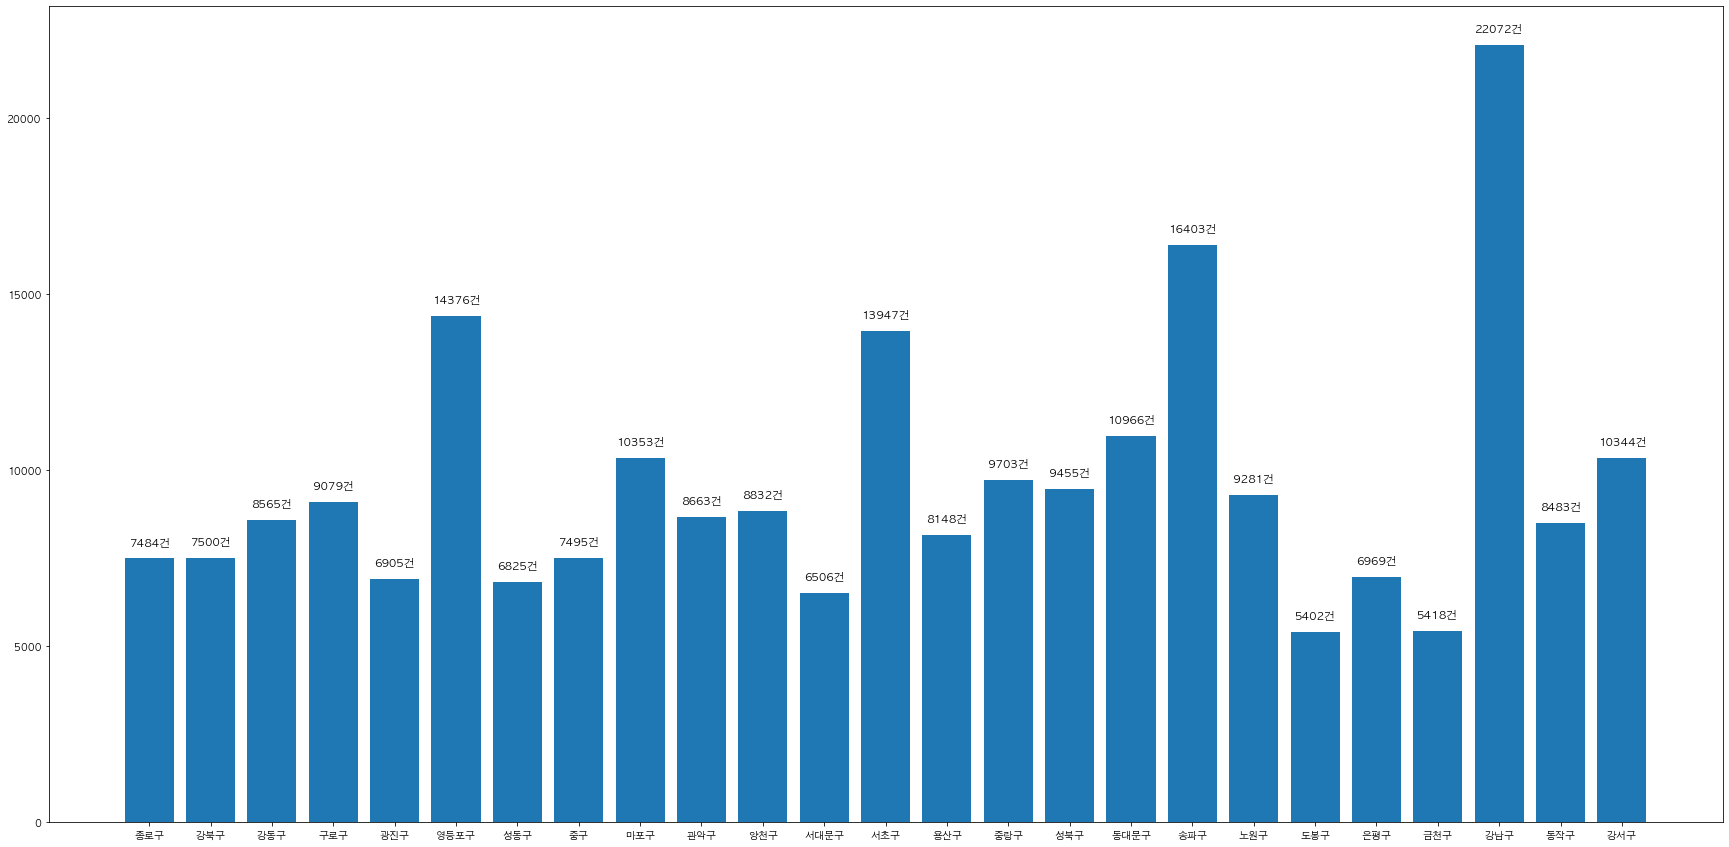

In [223]:
plt.figure(figsize=(30, 15))
for i, v in enumerate(seoul_detail):
    plt.text(v, seoul_cases[i], str(seoul_cases[i]) + "건\n",
    fontsize = 11, horizontalalignment = 'center')

plt.bar(seoul_detail, seoul_cases)

<BarContainer object of 31 artists>

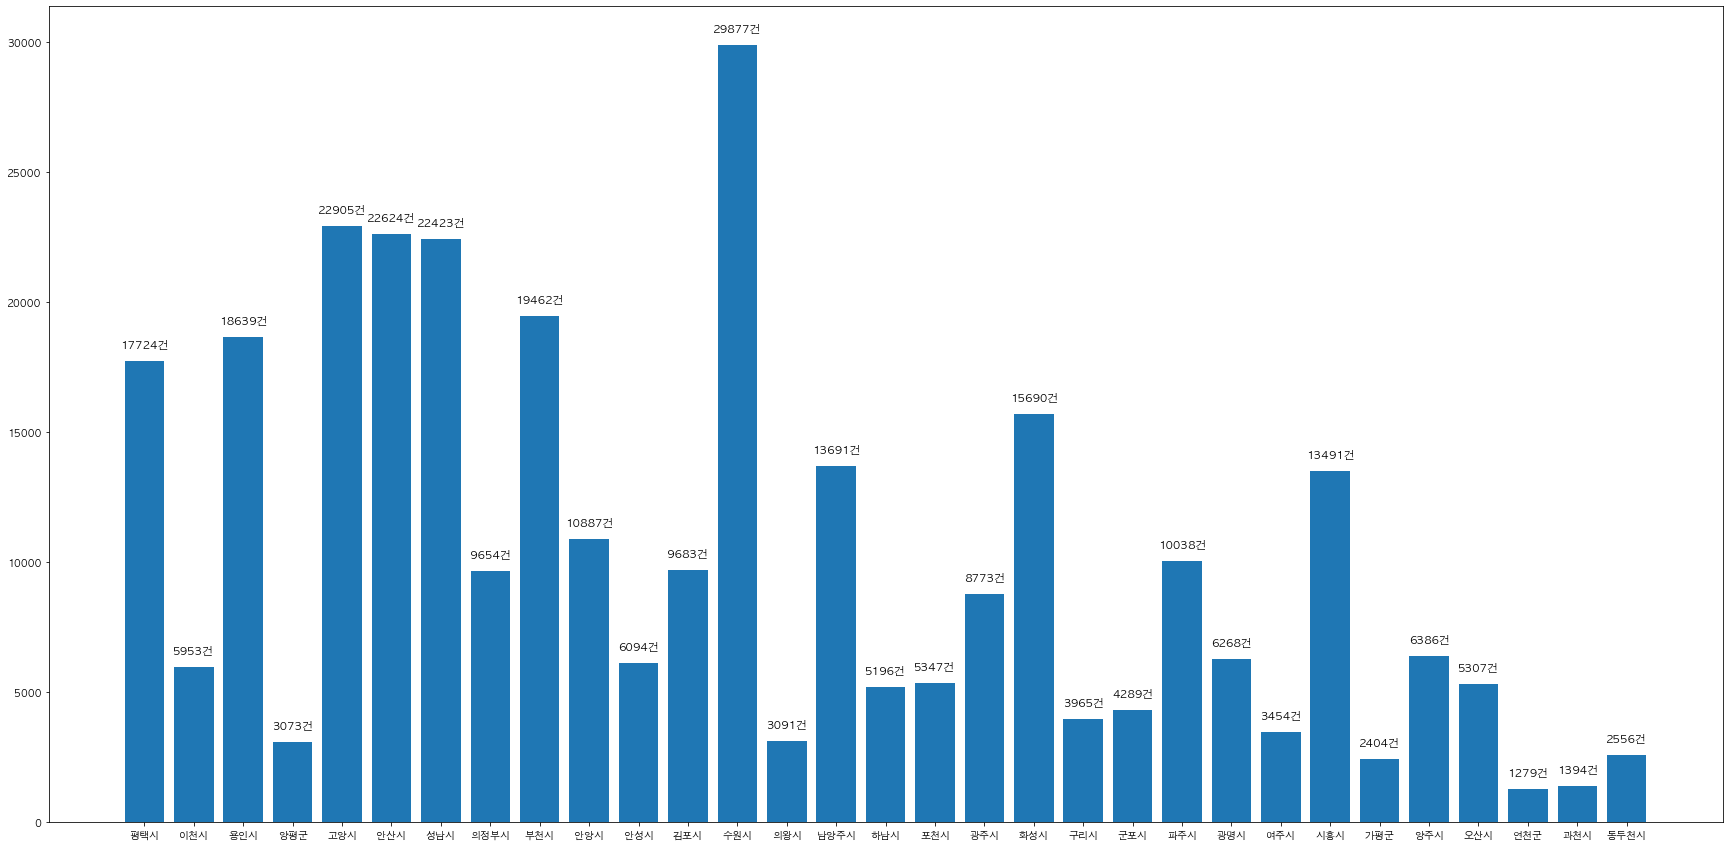

In [224]:
plt.figure(figsize = (30, 15))
for i, v in enumerate(kyungi_detail):
    plt.text(v, kyungi_cases[i], str(kyungi_cases[i]) + "건\n", fontsize = 11, horizontalalignment='center')
plt.bar(kyungi_detail, kyungi_cases)

# 응용 데이터 분석 3-1

In [225]:
road_status = cases.노면상태.unique()
road_status

array(['젖음/습기', '건조', '기타', '서리/결빙', '적설', '해빙', '침수'], dtype=object)

In [226]:
climate_status = cases.기상상태.unique()
climate_status

array(['흐림', '맑음', '기타/불명', '눈', '비', '안개'], dtype=object)

In [227]:
victim_degrees = cases.피해자신체상해정도.unique()
victim_degrees

array(['상해없음', '경상', '중상', '부상신고', '없음', '사망', '기타불명'], dtype=object)

In [228]:
cases_mid = []
cases_dead = []
road_status_cases = []

In [229]:
wet = cases[cases.노면상태 == '젖음/습기']
wet_mid = wet[wet.피해자신체상해정도 == '중상']
wet_dead = wet[wet.피해자신체상해정도 == '사망']

cases_mid.append(len(wet_mid))
cases_dead.append(len(wet_dead))

road_status_cases.append(len(wet))

In [230]:
dry = cases[cases.노면상태 == '건조']
dry_mid = dry[dry.피해자신체상해정도 == '중상']
dry_dead = dry[dry.피해자신체상해정도 == '사망']

cases_mid.append(len(dry_mid))
cases_dead.append(len(dry_dead))

road_status_cases.append(len(dry))

In [231]:
etc = cases[cases.노면상태 == '기타']
etc_mid = etc[etc.피해자신체상해정도 == '중상']
etc_dead = etc[etc.피해자신체상해정도 == '사망']

cases_mid.append(len(etc_mid))
cases_dead.append(len(etc_dead))

road_status_cases.append(len(etc))

In [232]:
frost = cases[cases.노면상태 == '서리/결빙']
frost_mid = frost[frost.피해자신체상해정도 == '중상']
frost_dead = frost[frost.피해자신체상해정도 == '사망']

cases_mid.append(len(frost_mid))
cases_dead.append(len(frost_dead))

road_status_cases.append(len(frost))

In [233]:
snow_cover = cases[cases.노면상태 == '적설']
snow_cover_mid = snow_cover[snow_cover.피해자신체상해정도 == '중상']
snow_cover_dead = snow_cover[snow_cover.피해자신체상해정도 == '사망']

cases_mid.append(len(snow_cover_mid))
cases_dead.append(len(snow_cover_dead))

road_status_cases.append(len(snow_cover))

In [234]:
thaw = cases[cases.노면상태 == '해빙']
thaw_mid = thaw[thaw.피해자신체상해정도 == '중상']
thaw_dead = thaw[thaw.피해자신체상해정도 == '사망']

cases_mid.append(len(thaw_mid))
cases_dead.append(len(thaw_dead))

road_status_cases.append(len(thaw))

In [235]:
flooding = cases[cases.노면상태 == '침수']
flooding_mid = flooding[flooding.피해자신체상해정도 == '중상']
flooding_dead = flooding[flooding.피해자신체상해정도 == '사망']

cases_mid.append(len(flooding_mid))
cases_dead.append(len(flooding_dead))

road_status_cases.append(len(flooding))

In [236]:
cases_mid

[10161, 109193, 1771, 508, 251, 2, 6]

In [237]:
cases_dead

[471, 3265, 47, 17, 11, 0, 0]

In [238]:
mid_df = pd.DataFrame({"중상_건_수" : cases_mid}, index = road_status)
mid_df

,중상_건_수
젖음/습기,10161
건조,109193
기타,1771
서리/결빙,508
적설,251
해빙,2
침수,6


In [239]:
dead_df = pd.DataFrame({"사망_건_수" : cases_dead}, index = road_status)
dead_df

,사망_건_수
젖음/습기,471
건조,3265
기타,47
서리/결빙,17
적설,11
해빙,0
침수,0


In [240]:
total_df = mid_df
total_df['사망_건_수'] = dead_df
total_df

,중상_건_수,사망_건_수
젖음/습기,10161,471
건조,109193,3265
기타,1771,47
서리/결빙,508,17
적설,251,11
해빙,2,0
침수,6,0


In [241]:
road_status_cases

[44596, 493955, 7880, 2842, 1486, 11, 21]

In [242]:
df_road_status_cases = pd.DataFrame({"노면상태별_사고_건_수" : road_status_cases}, index = road_status)
df_road_status_cases

,노면상태별_사고_건_수
젖음/습기,44596
건조,493955
기타,7880
서리/결빙,2842
적설,1486
해빙,11
침수,21


In [243]:
road_status_per = []

In [244]:
wet_cases_per = ((total_df.중상_건_수.loc['젖음/습기'] + total_df.사망_건_수.loc['젖음/습기']) / 
(df_road_status_cases.노면상태별_사고_건_수.loc['젖음/습기'])) * 100

road_status_per.append(wet_cases_per)

In [245]:
dry_cases_per = ((total_df.중상_건_수.loc['건조'] + total_df.사망_건_수.loc['건조']) / 
(df_road_status_cases.노면상태별_사고_건_수.loc['건조'])) * 100

road_status_per.append(dry_cases_per)

In [246]:
etc_cases_per = ((total_df.중상_건_수.loc['기타'] + total_df.사망_건_수.loc['기타']) / 
(df_road_status_cases.노면상태별_사고_건_수.loc['기타'])) * 100

road_status_per.append(etc_cases_per)

In [247]:
frost_cases_per = ((total_df.중상_건_수.loc['서리/결빙'] + total_df.사망_건_수.loc['서리/결빙']) / 
(df_road_status_cases.노면상태별_사고_건_수.loc['서리/결빙'])) * 100

road_status_per.append(frost_cases_per)

In [248]:
snow_cover_cases_per = ((total_df.중상_건_수.loc['적설'] + total_df.사망_건_수.loc['적설']) / 
(df_road_status_cases.노면상태별_사고_건_수.loc['적설'])) * 100

road_status_per.append(snow_cover_cases_per)

In [249]:
thaw_cases_per = ((total_df.중상_건_수.loc['해빙'] + total_df.사망_건_수.loc['해빙']) / 
(df_road_status_cases.노면상태별_사고_건_수.loc['해빙'])) * 100

road_status_per.append(thaw_cases_per)

In [250]:
flooding_cases_per = ((total_df.중상_건_수.loc['침수'] + total_df.사망_건_수.loc['침수']) / 
(df_road_status_cases.노면상태별_사고_건_수.loc['침수'])) * 100

road_status_per.append(flooding_cases_per)

In [251]:
df_road_status_per = pd.DataFrame({"%" : road_status_per}, index = road_status)
df_road_status_per

,%
젖음/습기,23.840703
건조,22.766851
기타,23.071066
서리/결빙,18.472906
적설,17.631225
해빙,18.181818
침수,28.571429


In [252]:
climate_mid = []
climate_dead = []
climate_status_cases = []

In [253]:
climate_status

array(['흐림', '맑음', '기타/불명', '눈', '비', '안개'], dtype=object)

In [254]:
cloudy = cases[cases.기상상태 == '흐림']
cloudy_mid = cloudy[cloudy.피해자신체상해정도 == '중상']
cloudy_dead = cloudy[cloudy.피해자신체상해정도 == '사망']

climate_mid.append(len(cloudy_mid))
climate_dead.append(len(cloudy_dead))

climate_status_cases.append(len(cloudy))

In [255]:
sunny = cases[cases.기상상태 == '맑음']
sunny_mid = sunny[sunny.피해자신체상해정도 == '중상']
sunny_dead = sunny[sunny.피해자신체상해정도 == '사망']

climate_mid.append(len(sunny_mid))
climate_dead.append(len(sunny_dead))

climate_status_cases.append(len(sunny))

In [256]:
unknown = cases[cases.기상상태 == '기타/불명']
unknown_mid = unknown[unknown.피해자신체상해정도 == '중상']
unknown_dead = unknown[unknown.피해자신체상해정도 == '사망']

climate_mid.append(len(unknown_mid))
climate_dead.append(len(unknown_dead))

climate_status_cases.append(len(unknown))

In [257]:
snow = cases[cases.기상상태 == '눈']
snow_mid = snow[snow.피해자신체상해정도 == '중상']
snow_dead = snow[snow.피해자신체상해정도 == '사망']

climate_mid.append(len(snow_mid))
climate_dead.append(len(snow_dead))

climate_status_cases.append(len(snow))

In [258]:
rain = cases[cases.기상상태 == '비']
rain_mid = cases[cases.피해자신체상해정도 == '중상']
rain_dead = cases[cases.피해자신체상해정도 == '사망']

climate_mid.append(len(rain_mid))
climate_dead.append(len(rain_dead))

climate_status_cases.append(len(rain))

In [259]:
fog = cases[cases.기상상태 == '안개']
fog_mid = cases[cases.피해자신체상해정도 == '중상']
fog_dead = cases[cases.피해자신체상해정도 == '사망']

climate_mid.append(len(fog_mid))
climate_dead.append(len(fog_dead))

climate_status_cases.append(len(fog))

In [260]:
print(climate_mid)
print(climate_dead)
print(climate_status_cases)

[4615, 108059, 1022, 551, 121892, 121892]
[264, 3185, 19, 22, 3811, 3811]
[19517, 490050, 4711, 2933, 33143, 437]


In [261]:
climate_mid_df = pd.DataFrame({"중상_건_수" : climate_mid}, index = climate_status)
climate_mid_df

,중상_건_수
흐림,4615
맑음,108059
기타/불명,1022
눈,551
비,121892
안개,121892


In [262]:
climate_dead_df = pd.DataFrame({"사망_건_수" : climate_dead}, index = climate_status)
climate_dead_df

,사망_건_수
흐림,264
맑음,3185
기타/불명,19
눈,22
비,3811
안개,3811


In [263]:
climate_total_df = climate_mid_df
climate_total_df['사망_건_수'] = climate_dead_df
climate_total_df

,중상_건_수,사망_건_수
흐림,4615,264
맑음,108059,3185
기타/불명,1022,19
눈,551,22
비,121892,3811
안개,121892,3811


In [264]:
df_climate_status_cases = pd.DataFrame({"기상상태별_사고_건_수" : climate_status_cases}, index = climate_status)
df_climate_status_cases

,기상상태별_사고_건_수
흐림,19517
맑음,490050
기타/불명,4711
눈,2933
비,33143
안개,437


In [265]:
climate_status_per = []

In [266]:
cloudy_cases_per = ((climate_total_df.중상_건_수.loc['흐림'] + climate_total_df.사망_건_수.loc['흐림']) / 
(df_climate_status_cases.기상상태별_사고_건_수.loc['흐림'])) * 100

climate_status_per.append(cloudy_cases_per)

In [267]:
sunny_cases_per = ((climate_total_df.중상_건_수.loc['맑음'] + climate_total_df.사망_건_수.loc['맑음']) / 
(df_climate_status_cases.기상상태별_사고_건_수.loc['맑음'])) * 100

climate_status_per.append(sunny_cases_per)

In [268]:
unknown_cases_per = ((climate_total_df.중상_건_수.loc['기타/불명'] + climate_total_df.사망_건_수.loc['기타/불명']) / 
(df_climate_status_cases.기상상태별_사고_건_수.loc['기타/불명'])) * 100

climate_status_per.append(unknown_cases_per)

In [269]:
snow_cases_per = ((climate_total_df.중상_건_수.loc['눈'] + climate_total_df.사망_건_수.loc['눈']) / 
(df_climate_status_cases.기상상태별_사고_건_수.loc['눈'])) * 100

climate_status_per.append(snow_cases_per)

In [270]:
rain_cases_per = ((climate_total_df.중상_건_수.loc['비'] + climate_total_df.사망_건_수.loc['비']) / 
(df_climate_status_cases.기상상태별_사고_건_수.loc['비'])) * 100

climate_status_per.append(rain_cases_per)

In [271]:
fog_cases_per = ((climate_total_df.중상_건_수.loc['안개'] + climate_total_df.사망_건_수.loc['안개']) / 
(df_climate_status_cases.기상상태별_사고_건_수.loc['안개'])) * 100

climate_status_per.append(fog_cases_per)

In [272]:
df_climate_status_per = pd.DataFrame({"%" : climate_status_per}, index = climate_status)
df_climate_status_per

,%
흐림,24.998719
맑음,22.700541
기타/불명,22.097219
눈,19.536311
비,379.274658
안개,28764.988558


# 응용 데이터 분석 3 - 4

이친구는 각 구별 시간별 발생 사고 수 데이터를 보고 분석한 후에 하는 게 좋을 거 같아 사실 가설을 세우기 보단 시간별 데이터를 해석하는게 순서상 맞다고 봄
 데이터를 각 구별로 1개씩, 경기도는 시 별로 1개씩 따로 만드는게 좋을 것 같다는 생각이 듦 (x축 : 24개의 시,  y축 : 사고 발생 건수)


In [273]:
time_detail = cases.발생시간.unique()
time_detail

array(['00시', '01시', '02시', '03시', '04시', '05시', '06시', '07시', '08시',
       '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시',
       '18시', '19시', '20시', '21시', '22시', '23시'], dtype=object)

In [274]:
time_cases = []

In [275]:
seoul_detail

array(['종로구', '강북구', '강동구', '구로구', '광진구', '영등포구', '성동구', '중구', '마포구',
       '관악구', '양천구', '서대문구', '서초구', '용산구', '중랑구', '성북구', '동대문구', '송파구',
       '노원구', '도봉구', '은평구', '금천구', '강남구', '동작구', '강서구'], dtype=object)

In [276]:
for detail in list(seoul_detail):
  line = []
  for time in list(time_detail):
    seoul_gu_temp = cases[cases.발생지_시군구 == detail]
    line.append(len(seoul_gu_temp[seoul_gu_temp.발생시간 == time]))
  time_cases.append(line)

In [277]:
total_time_df = pd.DataFrame({"종로구_사고_건_수" : time_cases[0]}, index = time_detail)

In [278]:
idx = 1

for i in seoul_detail[1:25]:
  total_time_df[str(i) + '_사고_건_수'] = time_cases[idx]
  idx += 1

In [279]:
total_time_df

,종로구_사고_건_수,강북구_사고_건_수,강동구_사고_건_수,구로구_사고_건_수,광진구_사고_건_수,영등포구_사고_건_수,성동구_사고_건_수,중구_사고_건_수,마포구_사고_건_수,관악구_사고_건_수,...,성북구_사고_건_수,동대문구_사고_건_수,송파구_사고_건_수,노원구_사고_건_수,도봉구_사고_건_수,은평구_사고_건_수,금천구_사고_건_수,강남구_사고_건_수,동작구_사고_건_수,강서구_사고_건_수
00시,344,283,300,368,297,603,247,299,502,407,...,332,371,612,337,172,255,220,954,354,382
01시,246,217,221,254,277,490,211,227,437,322,...,295,280,526,244,131,216,170,863,276,283
02시,177,211,194,201,236,373,159,174,354,302,...,242,217,381,196,97,156,137,701,199,224
03시,146,172,132,168,156,265,132,111,315,193,...,196,169,287,133,83,126,93,574,157,175
04시,114,184,141,162,164,280,146,131,273,192,...,163,182,295,167,79,109,99,475,158,185
05시,147,177,181,225,142,329,147,154,243,208,...,196,210,298,207,101,143,147,535,177,271
06시,160,187,203,232,179,319,170,144,272,243,...,205,282,387,212,117,213,135,524,191,292
07시,247,194,314,268,232,429,203,235,278,270,...,277,311,547,333,176,221,177,607,251,362
08시,321,328,446,410,344,716,320,335,444,404,...,528,597,822,439,250,333,267,913,448,523
09시,318,336,373,377,314,614,323,307,412,345,...,432,519,794,410,233,301,218,975,385,454


In [294]:
seoul_

In [312]:
def DrawBarGraph(pList, idx):
  plt.figure(figsize=(30, 15))
  for i, v, in enumerate(time_detail):
    plt.text(v, pList[i], str(pList[i]) + "건\n",
    fontsize = 11, horizontalalignment = 'center')

  plt.title(seoul_detail[idx])
  plt.bar(time_detail, pList)

/var/folders/96/8bx50j9j1sd_5ssl3jw8w5dm0000gn/T/ipykernel_18901/1496243574.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30, 15))


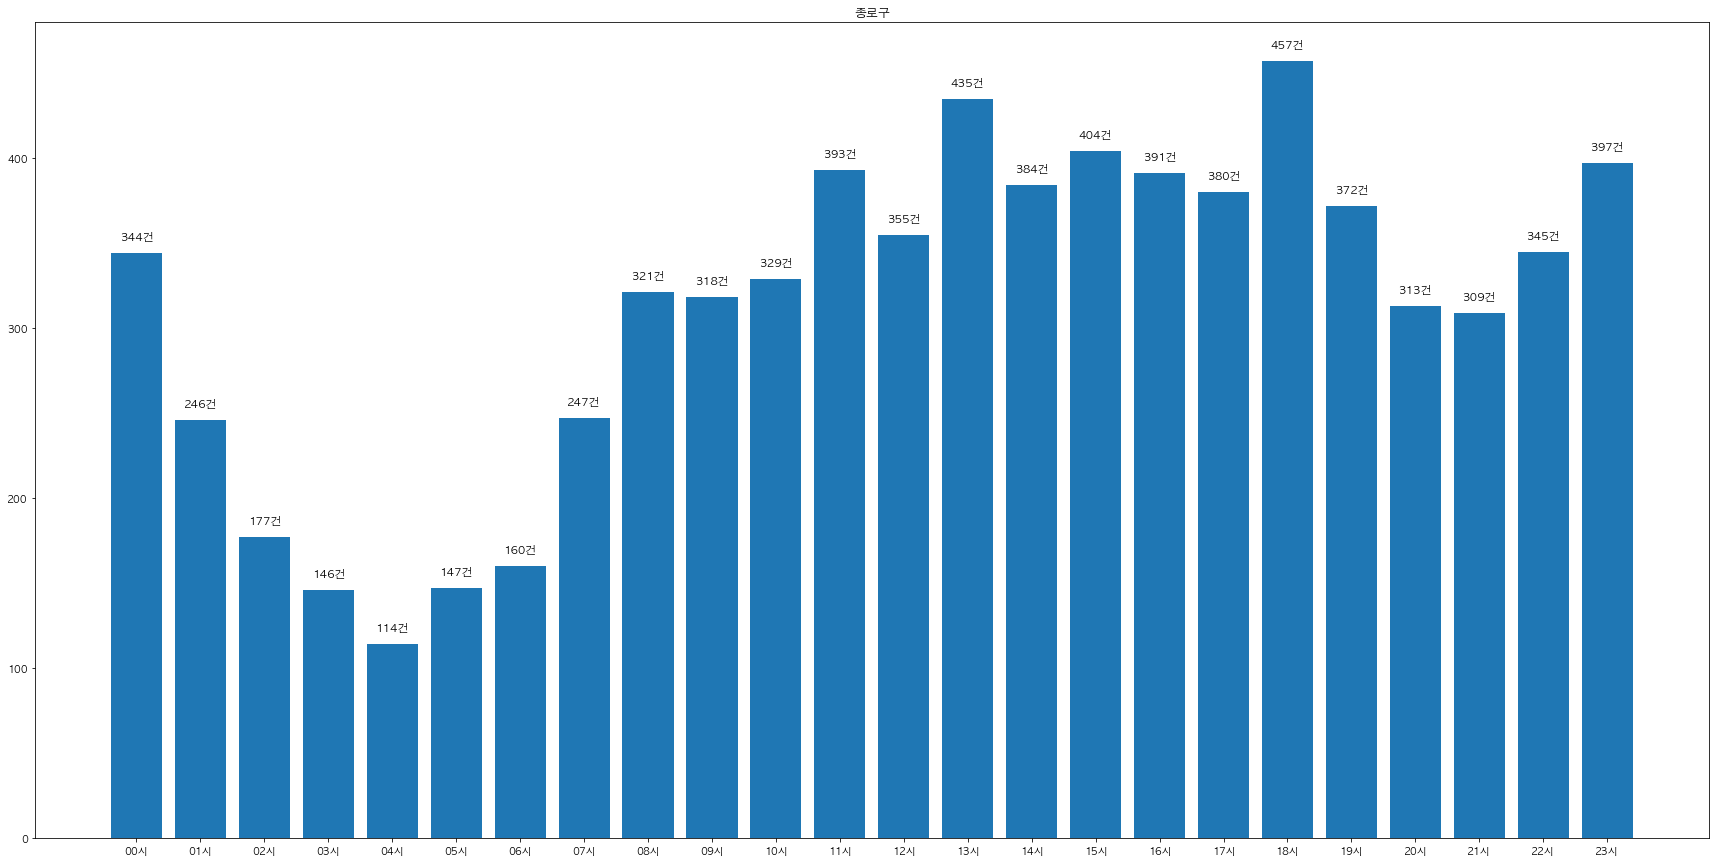

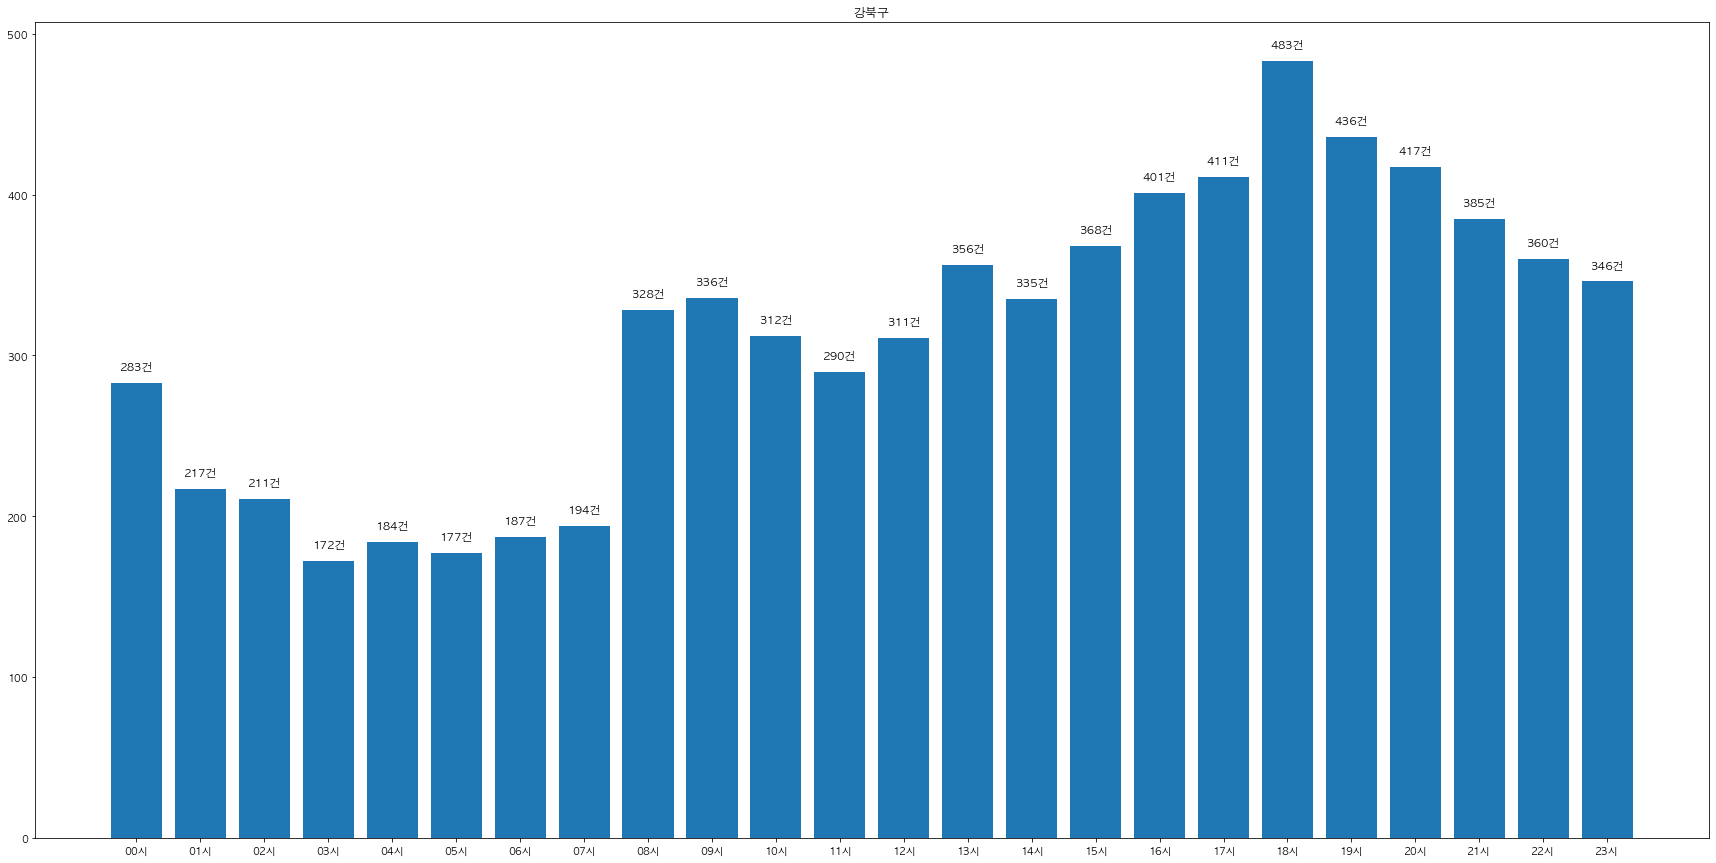

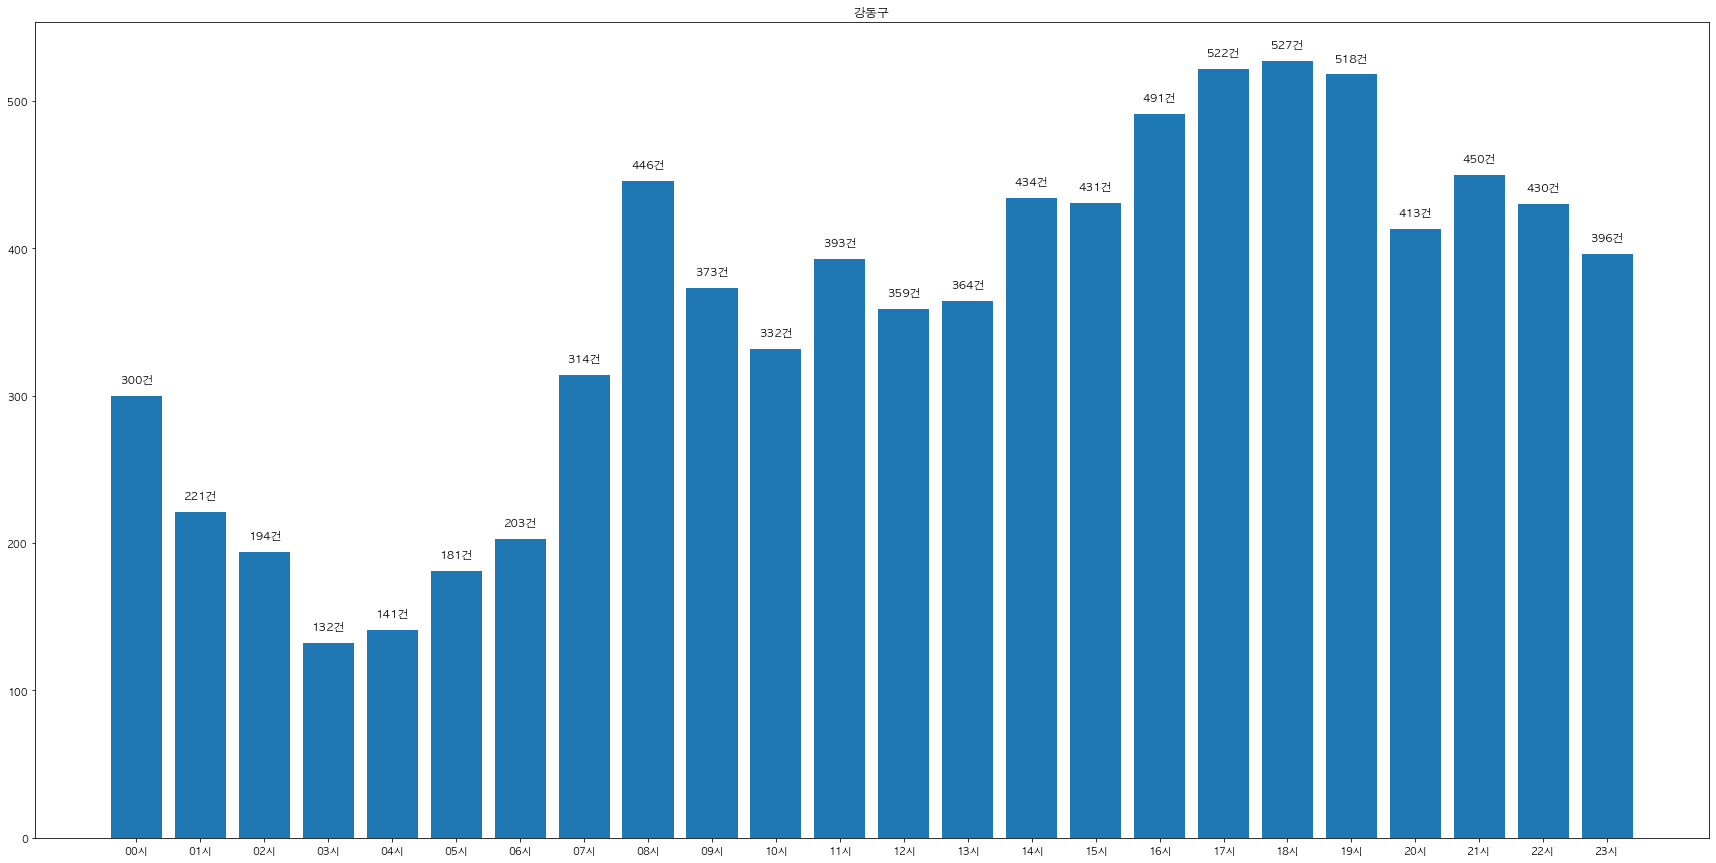

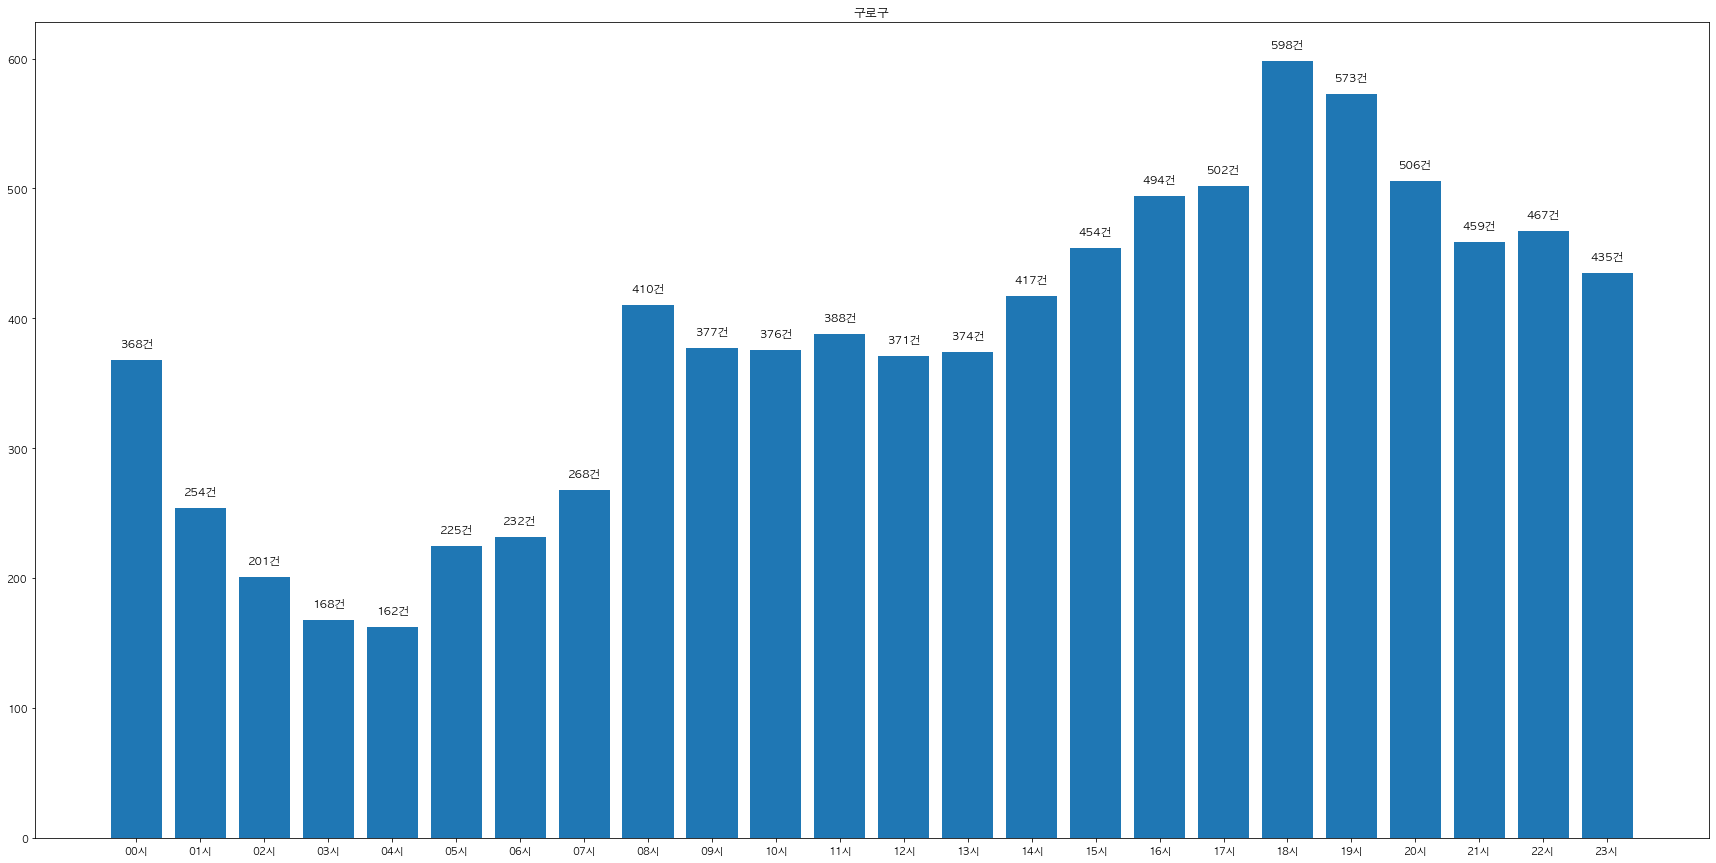

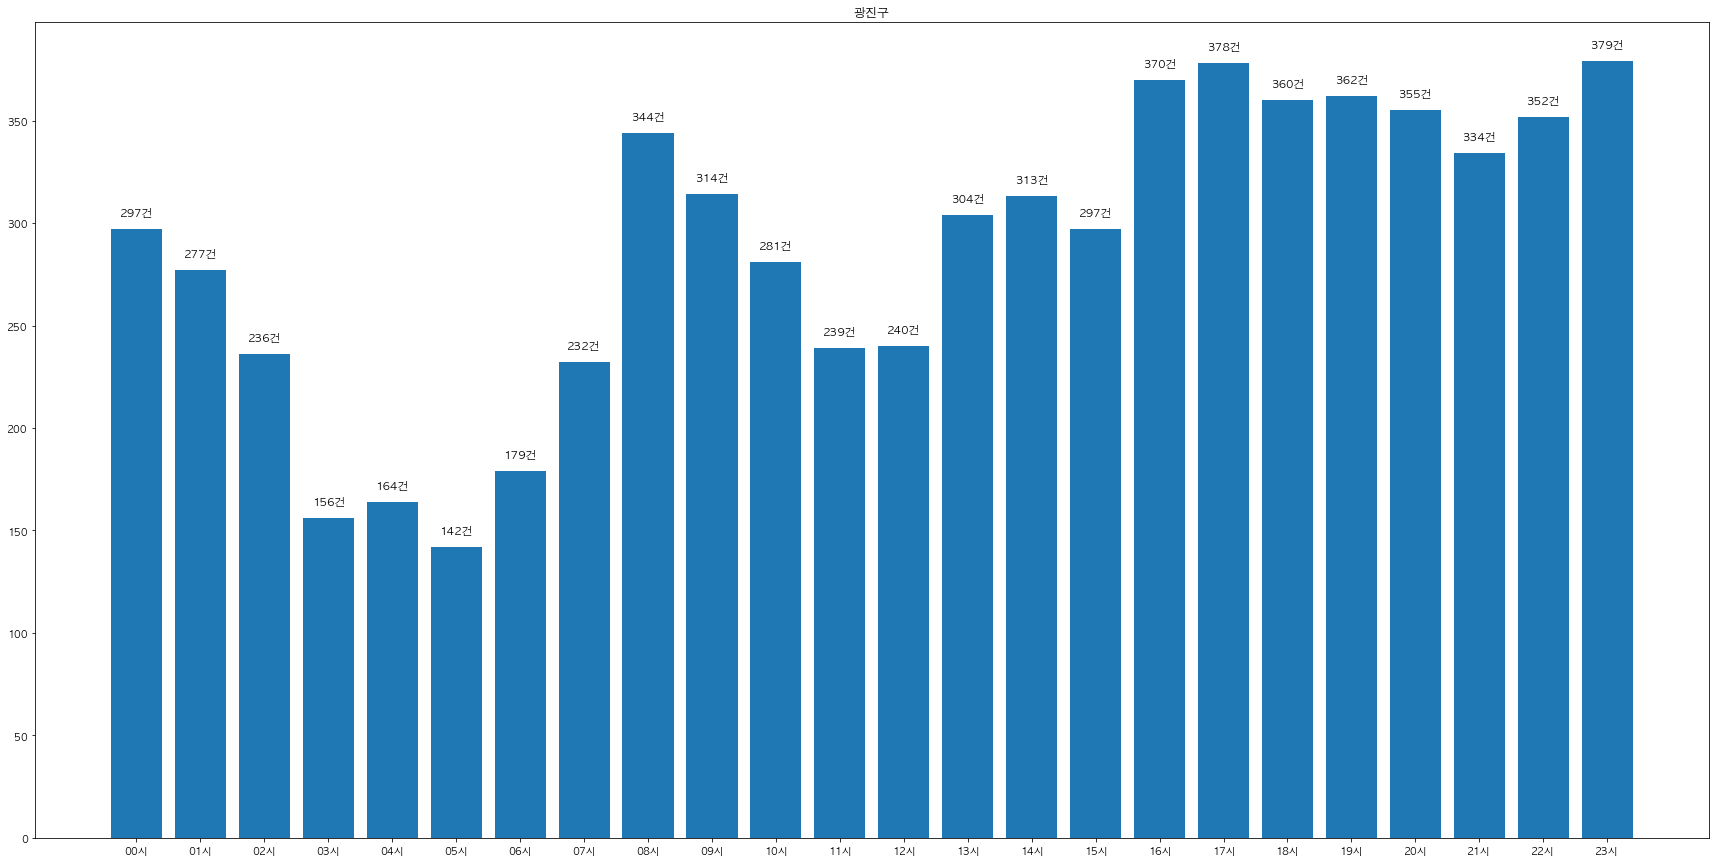

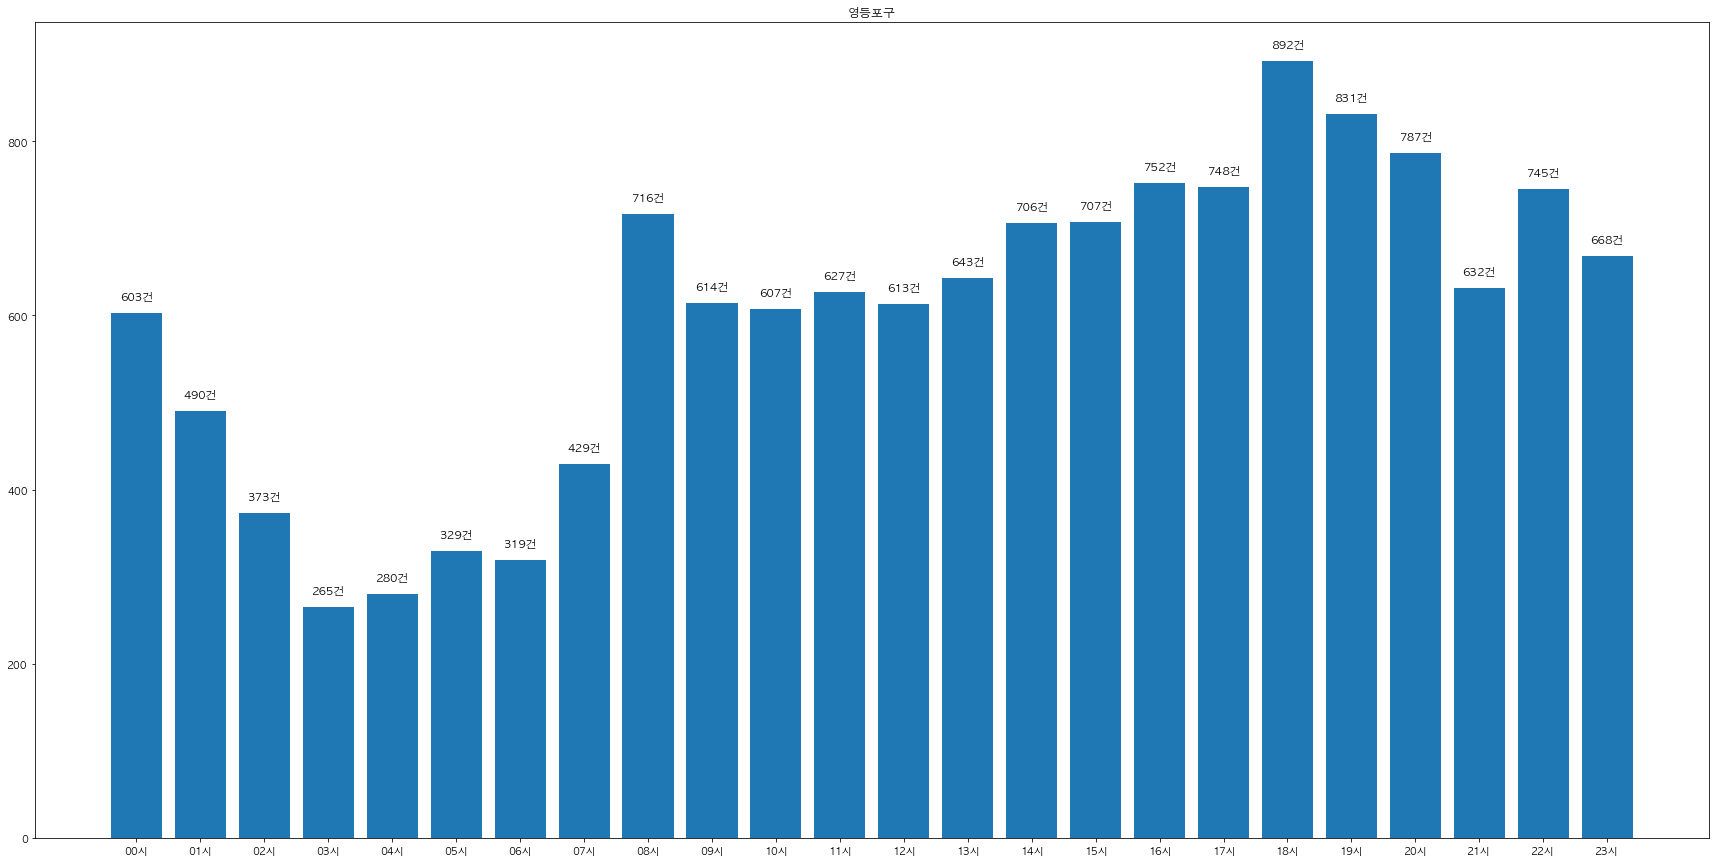

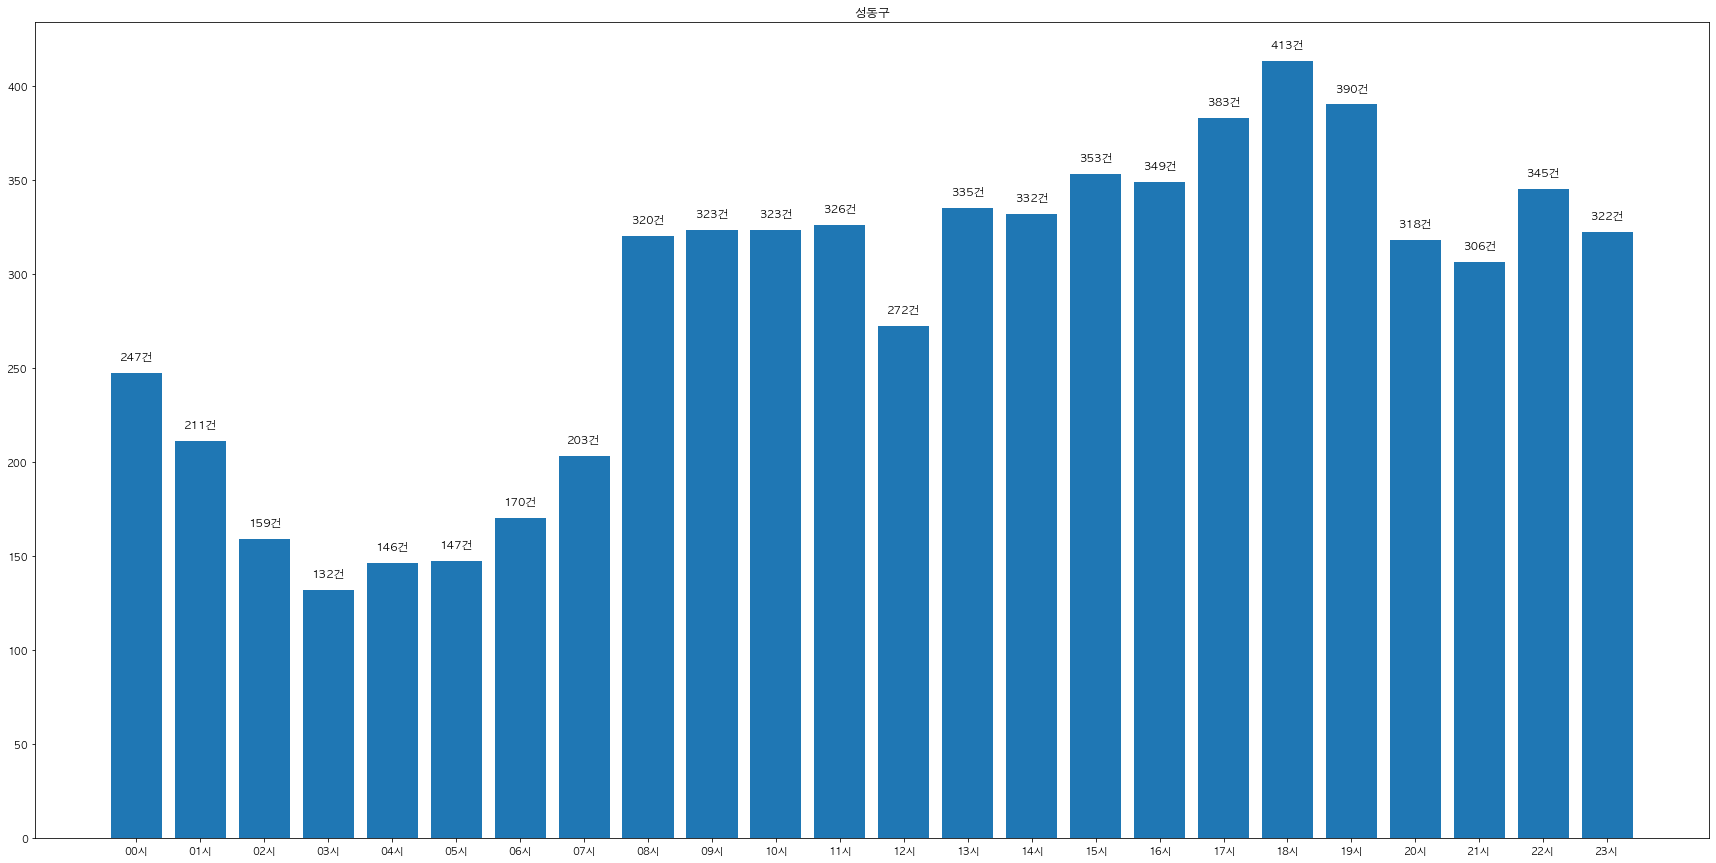

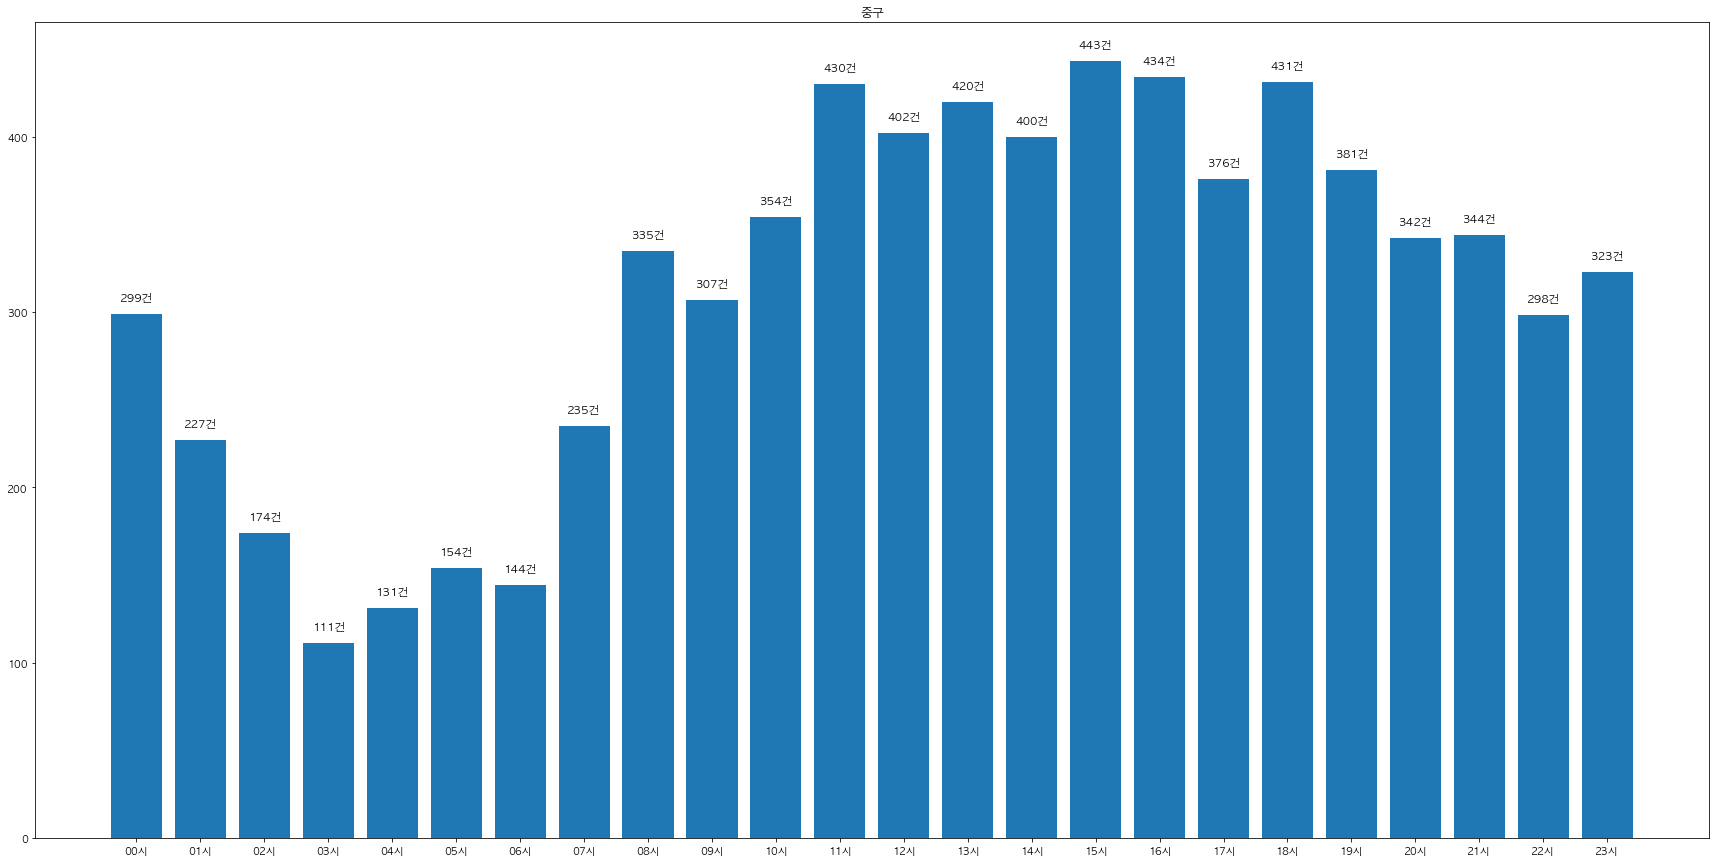

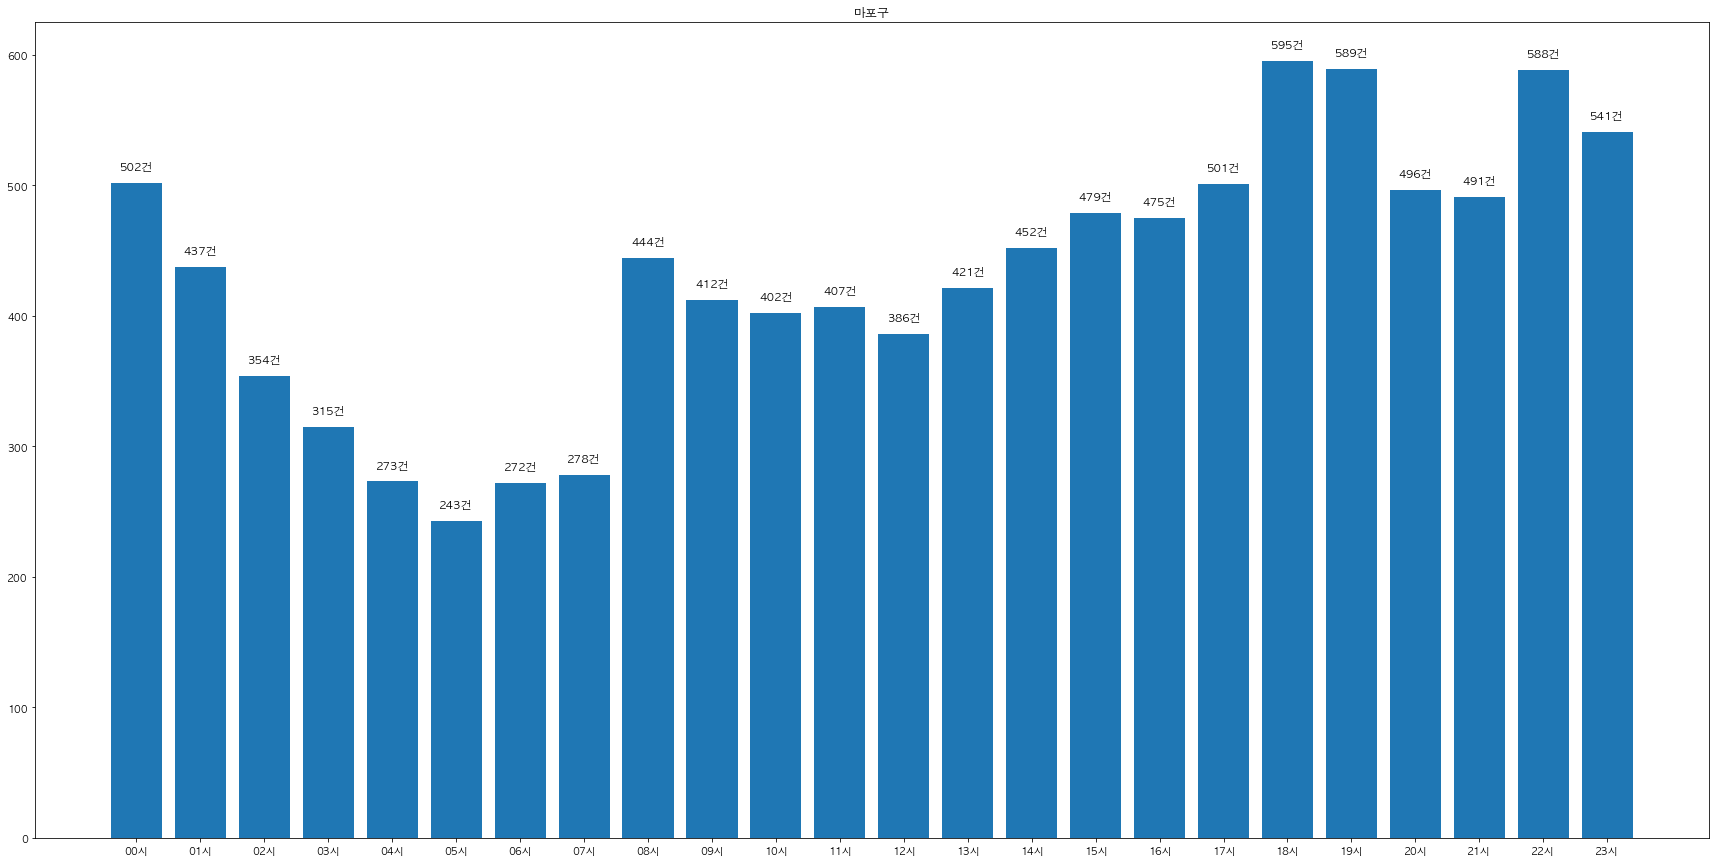

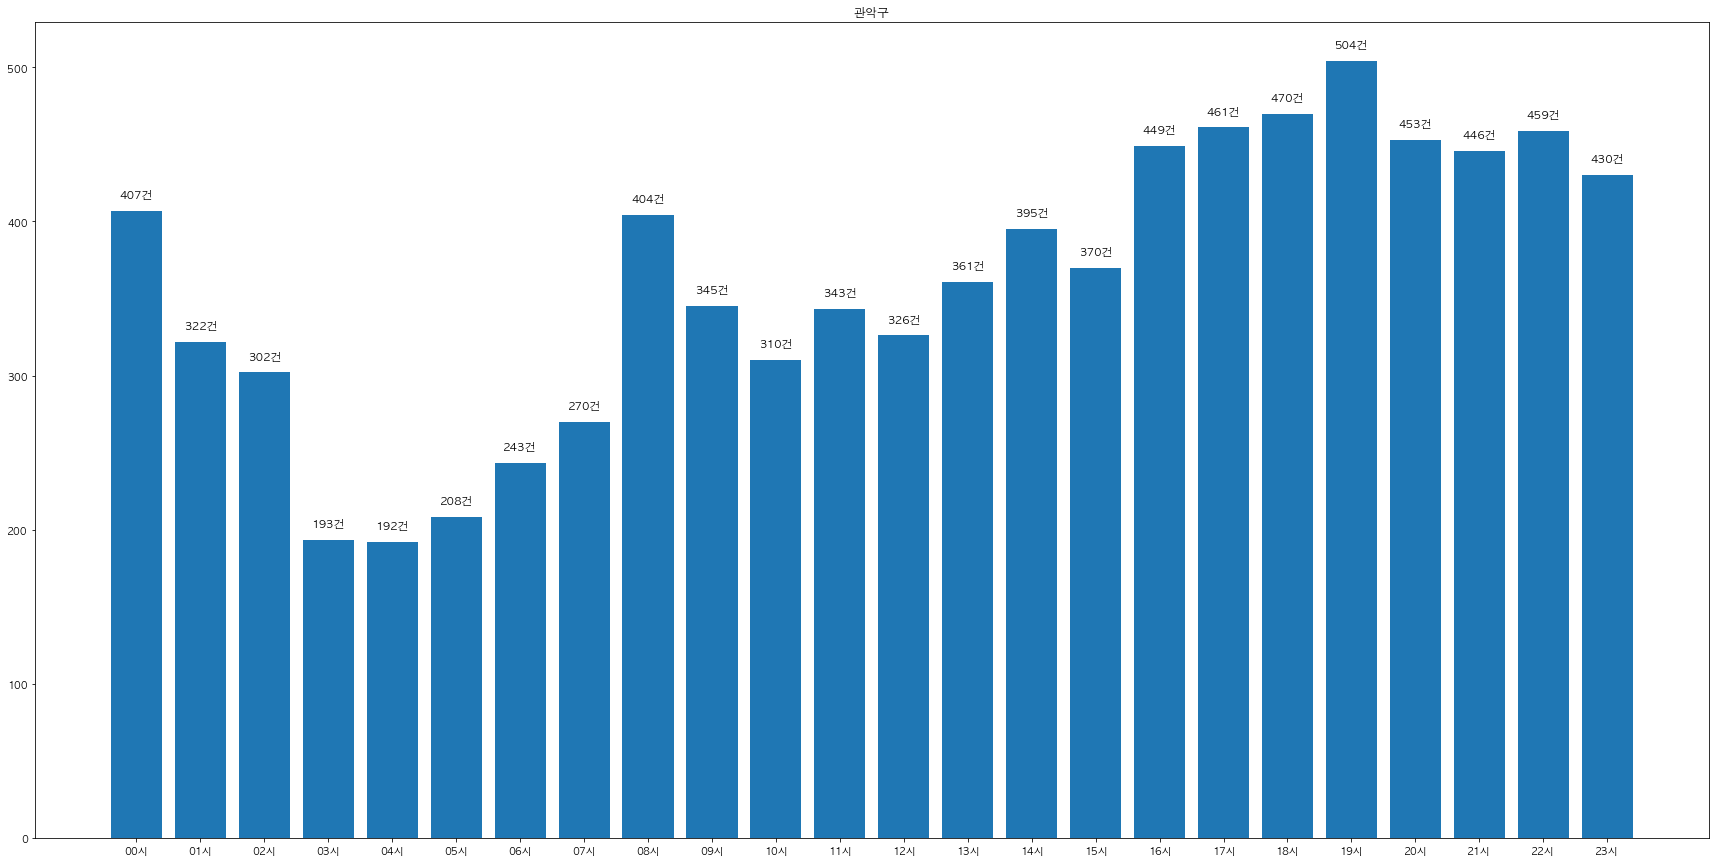

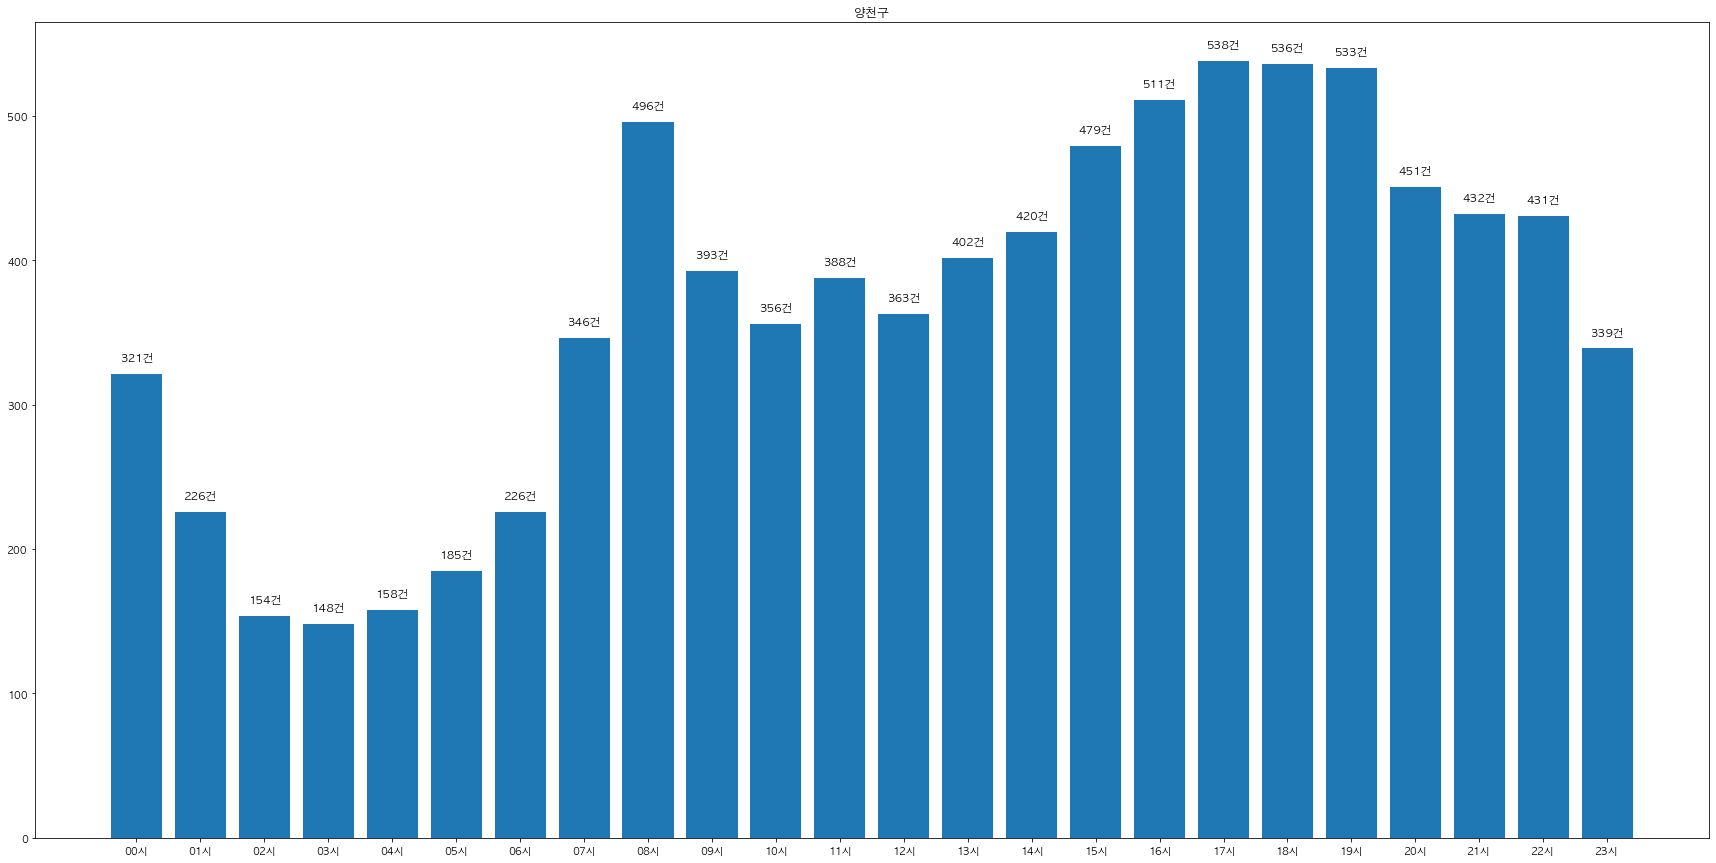

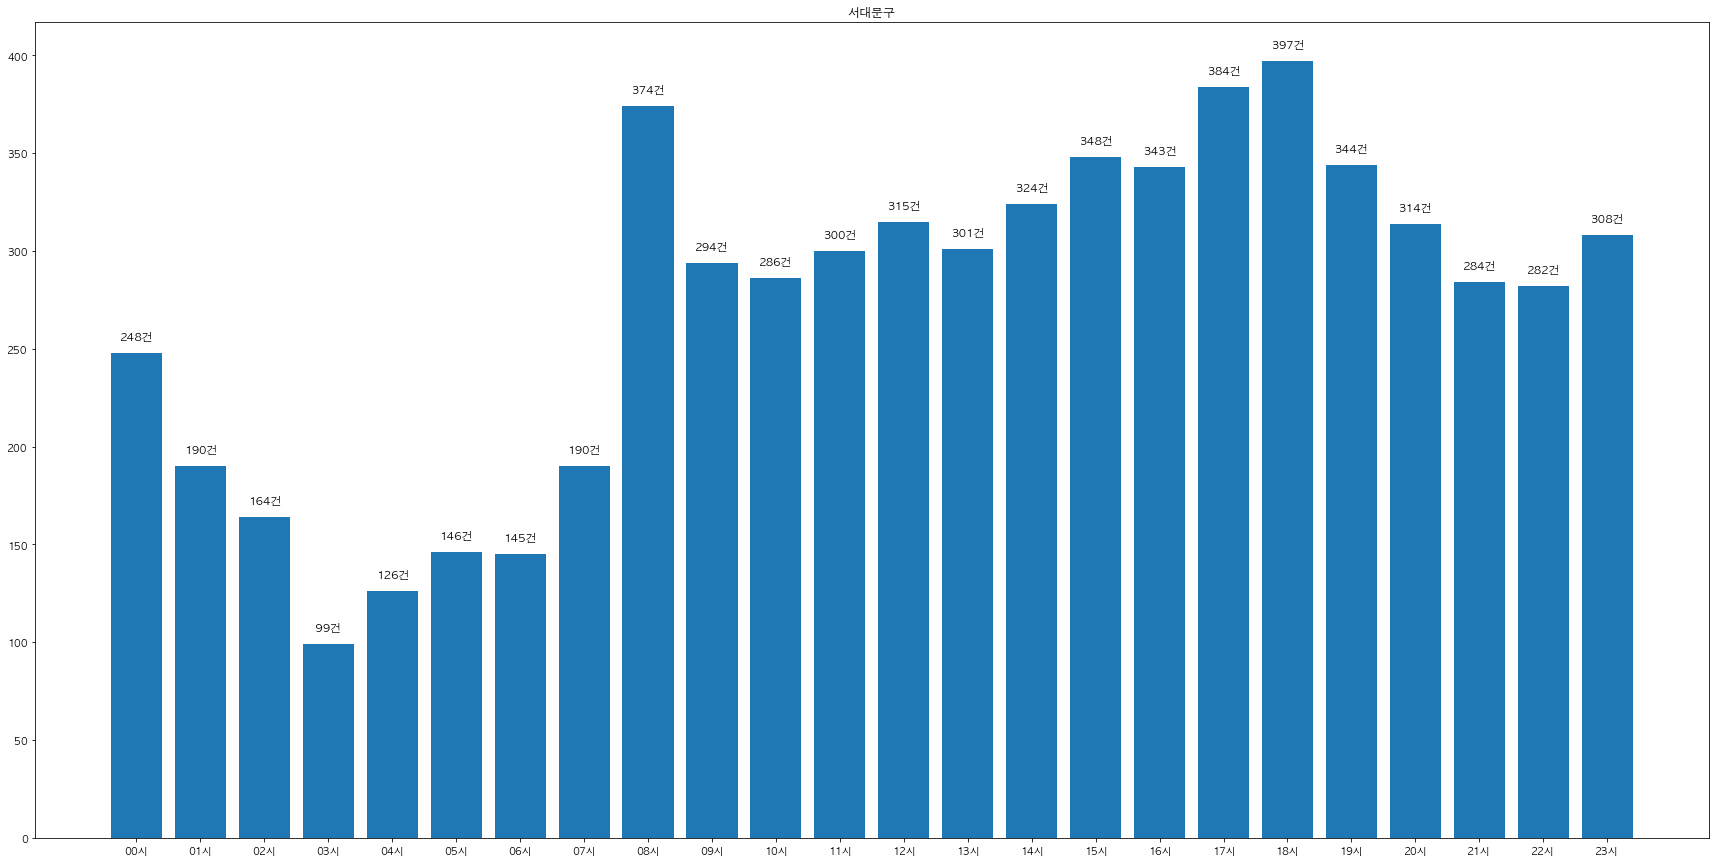

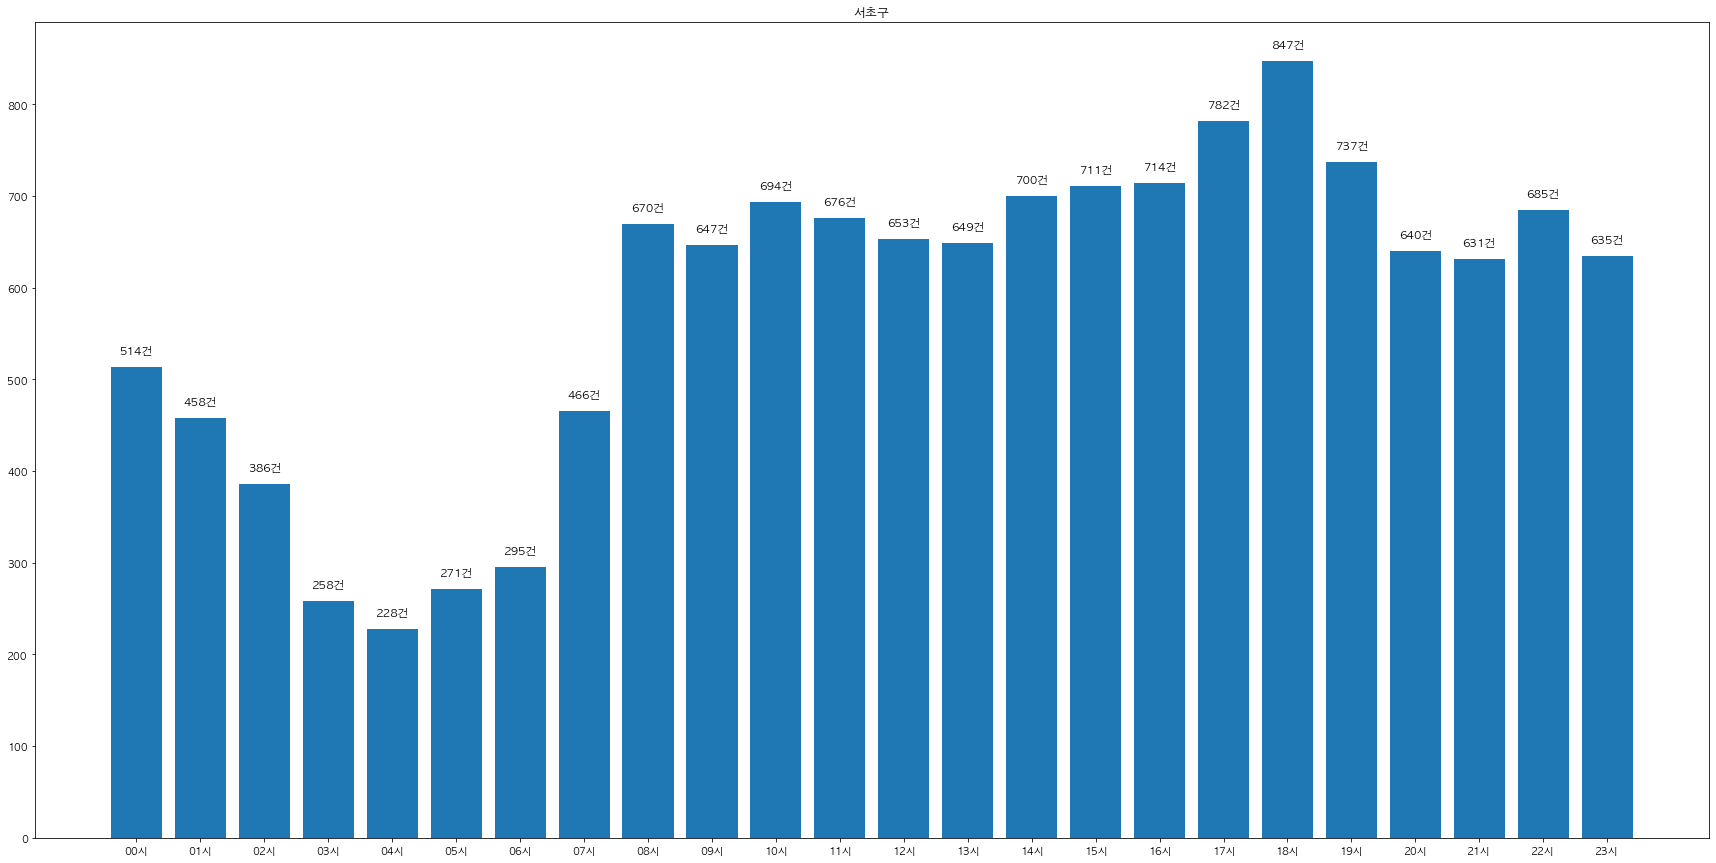

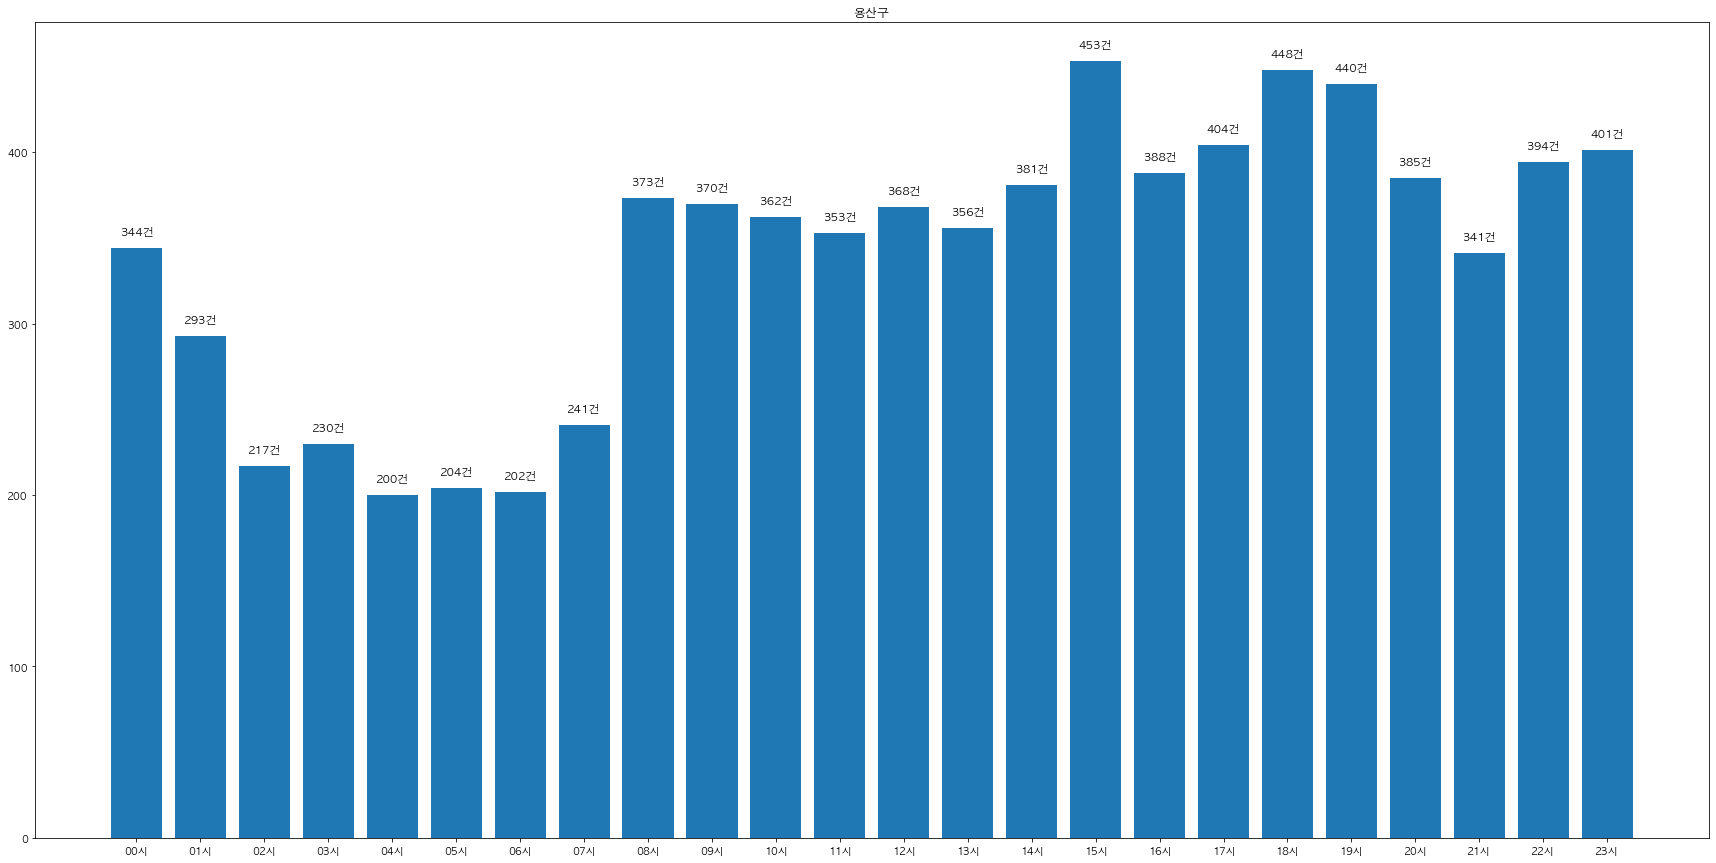

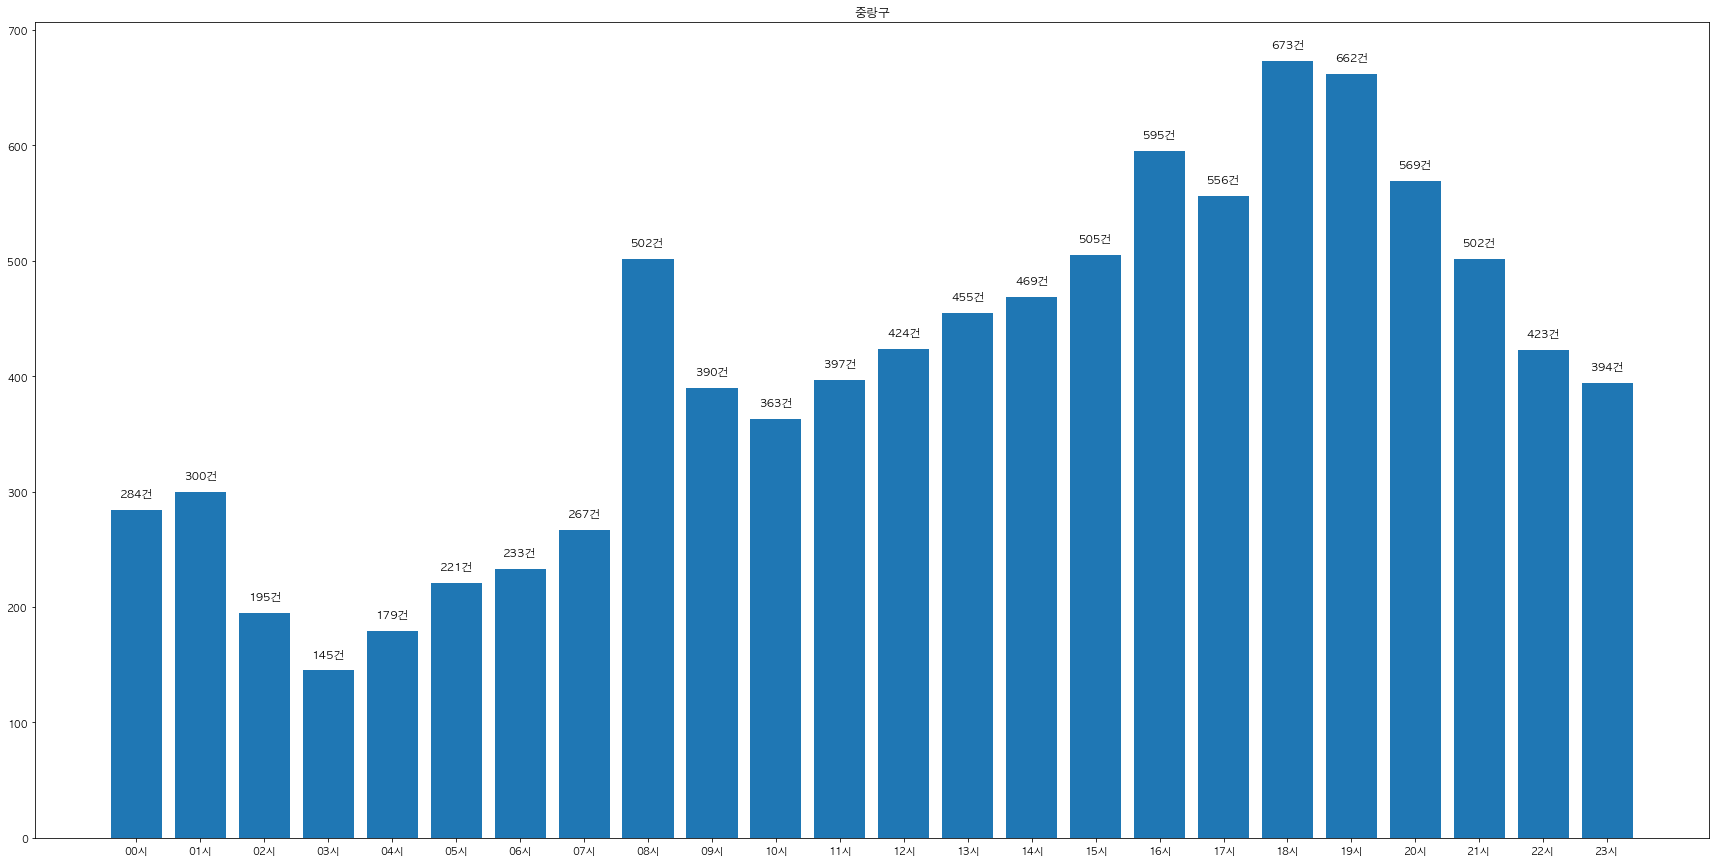

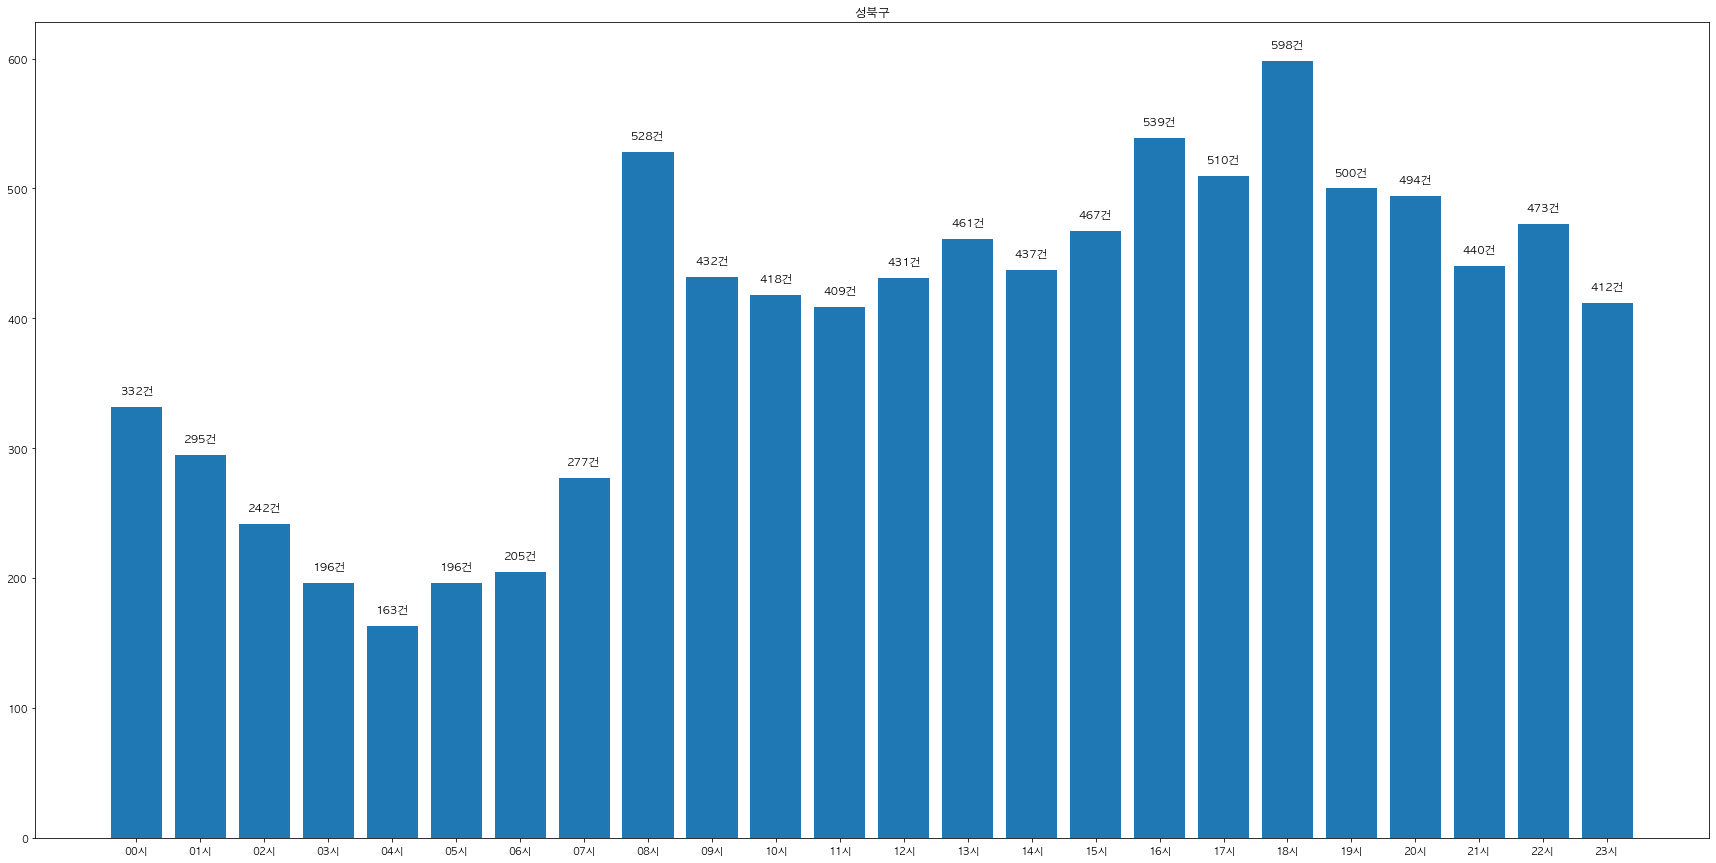

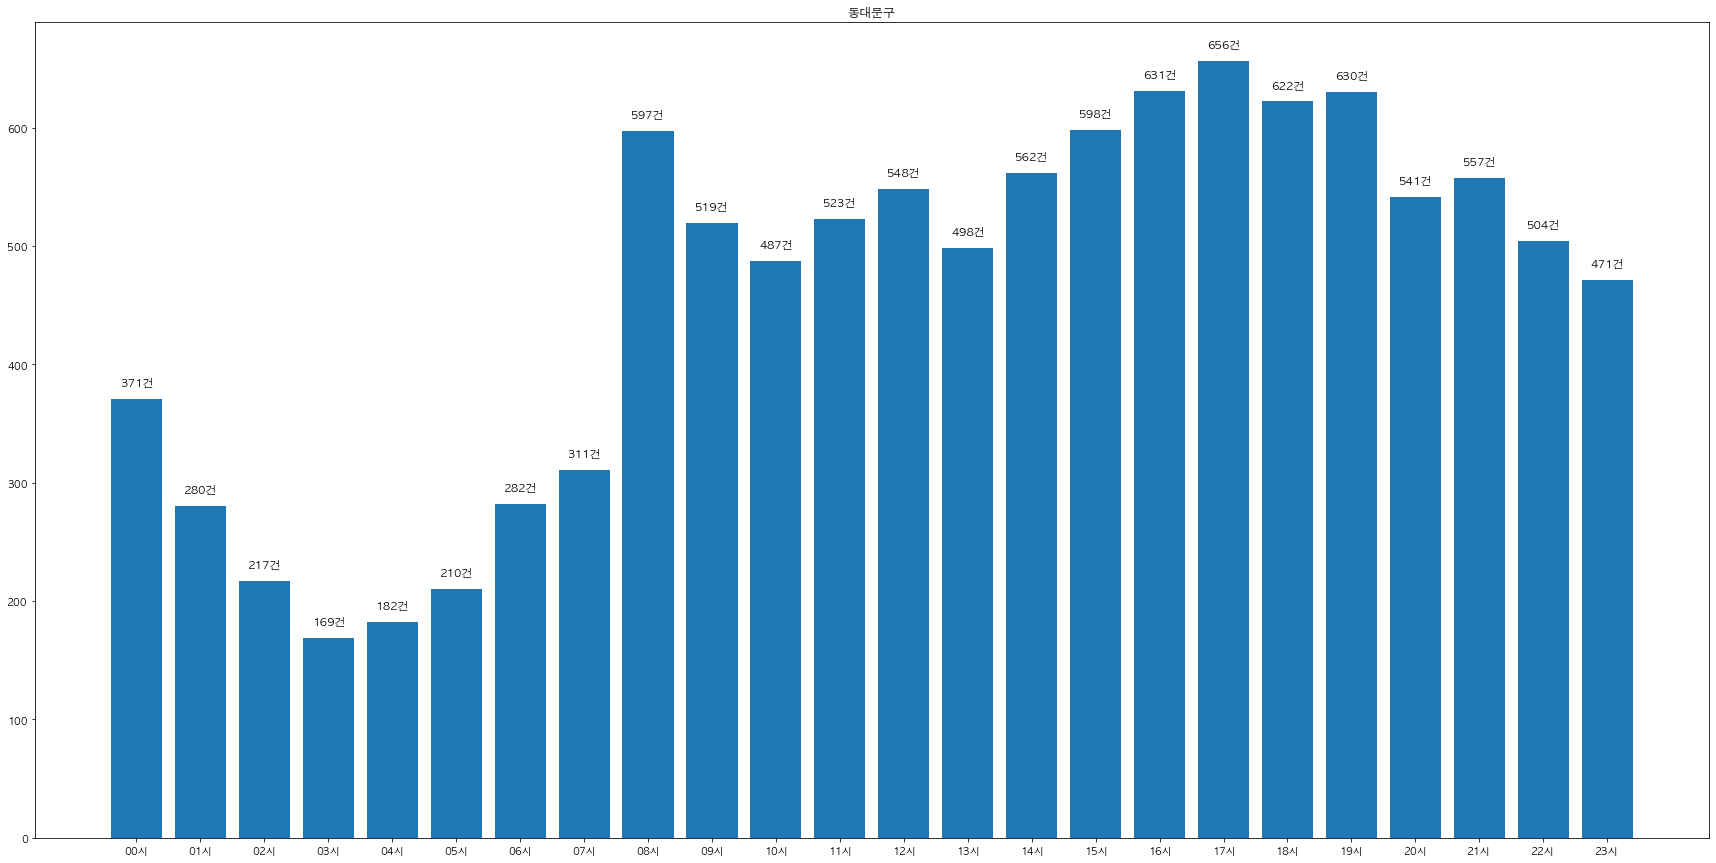

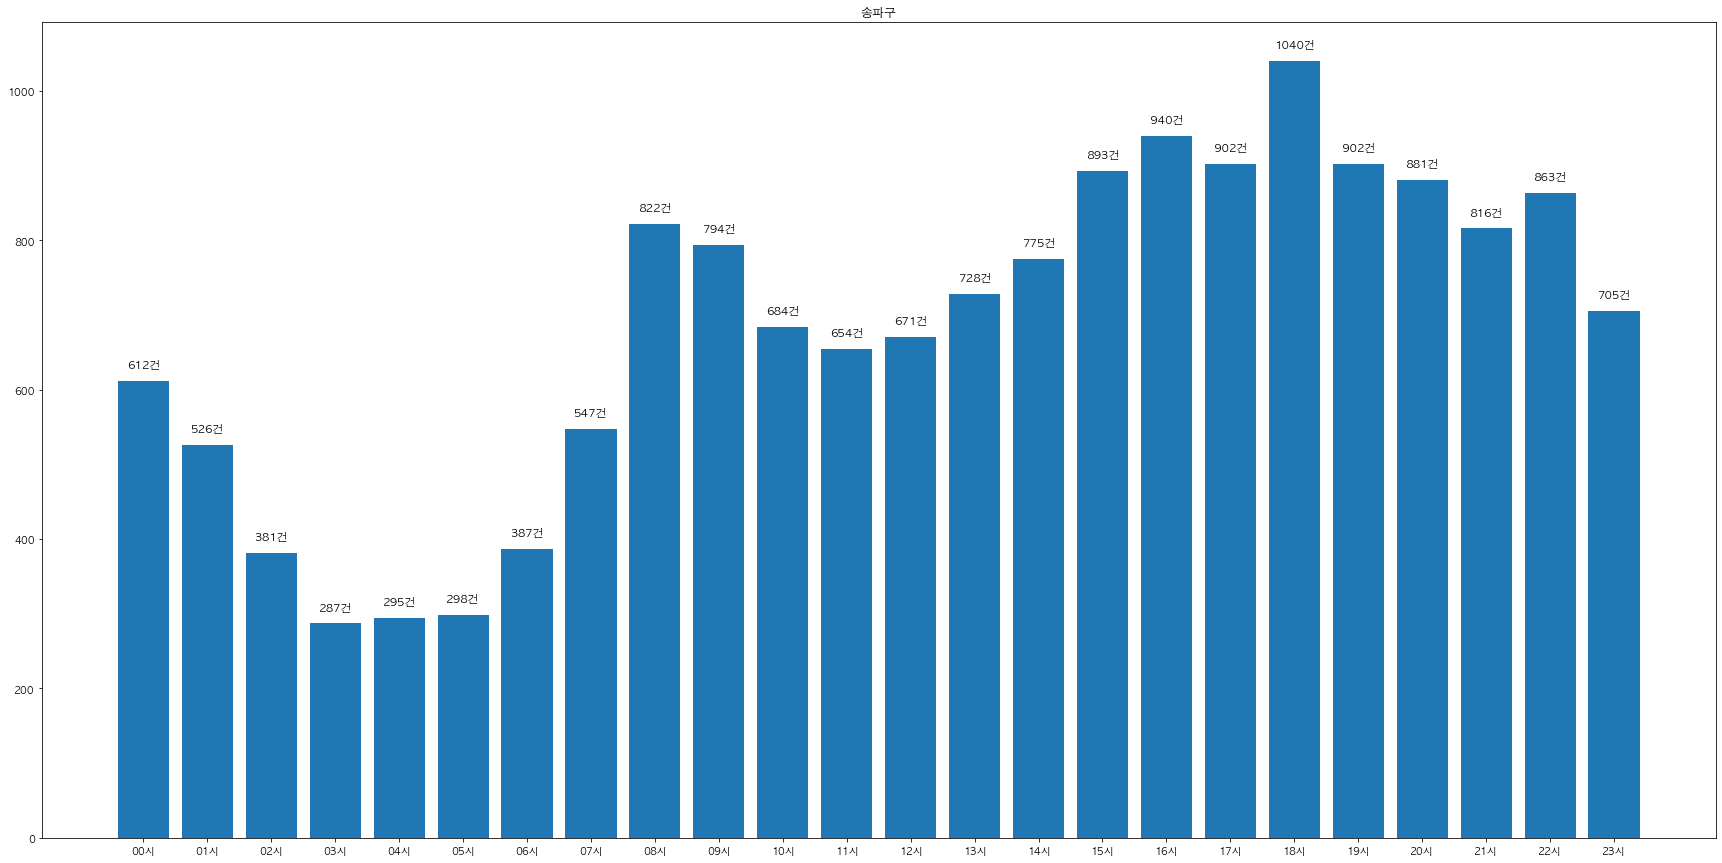

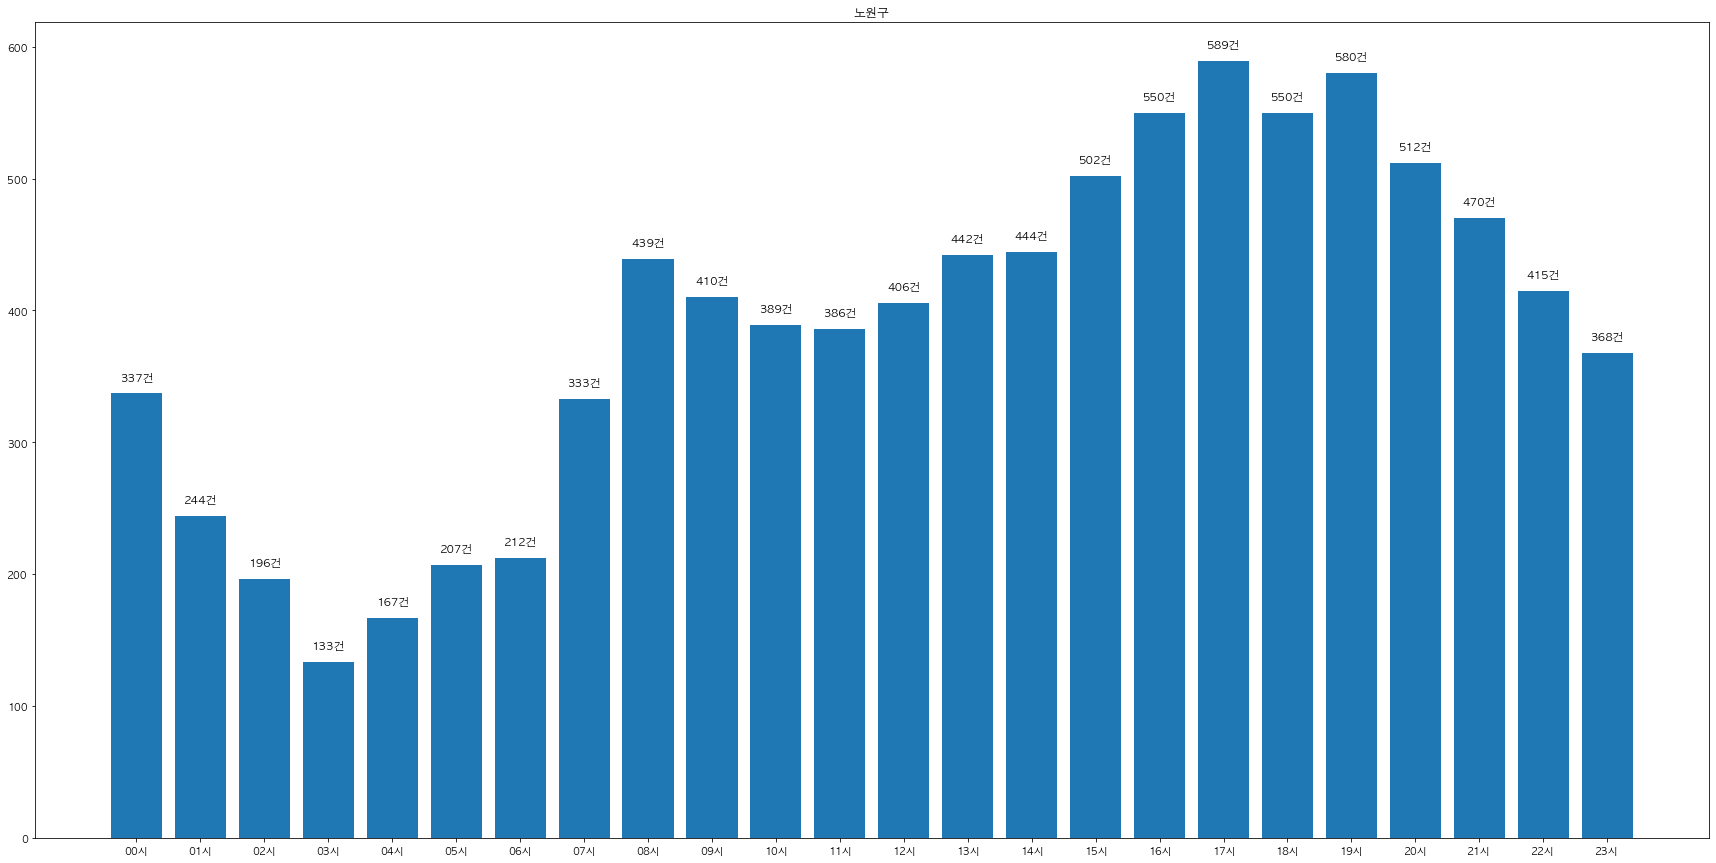

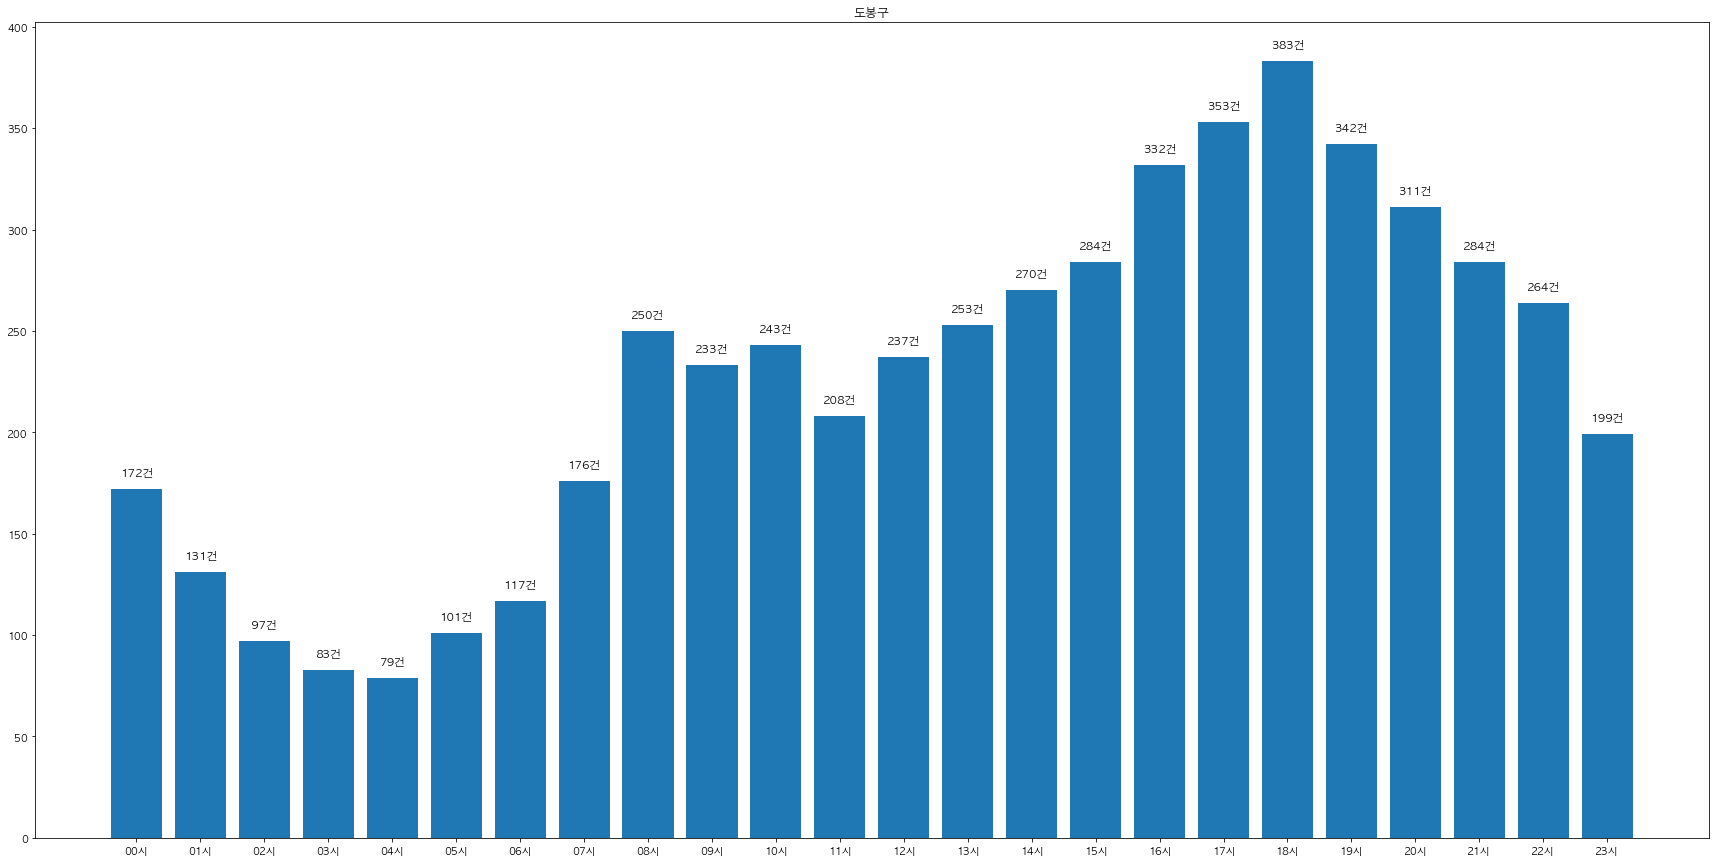

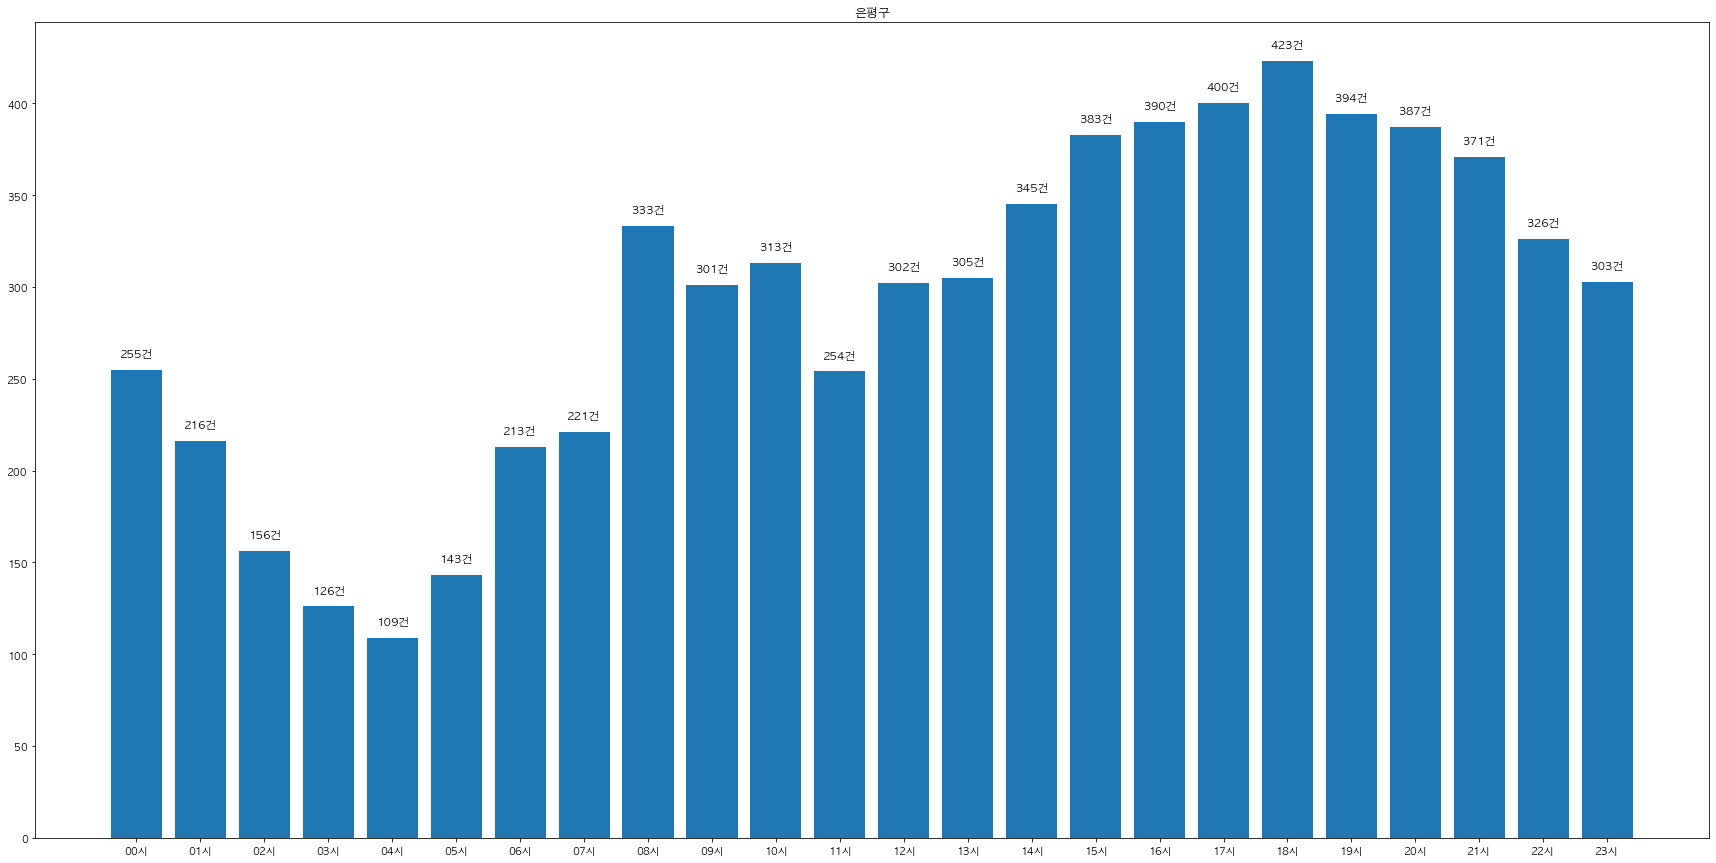

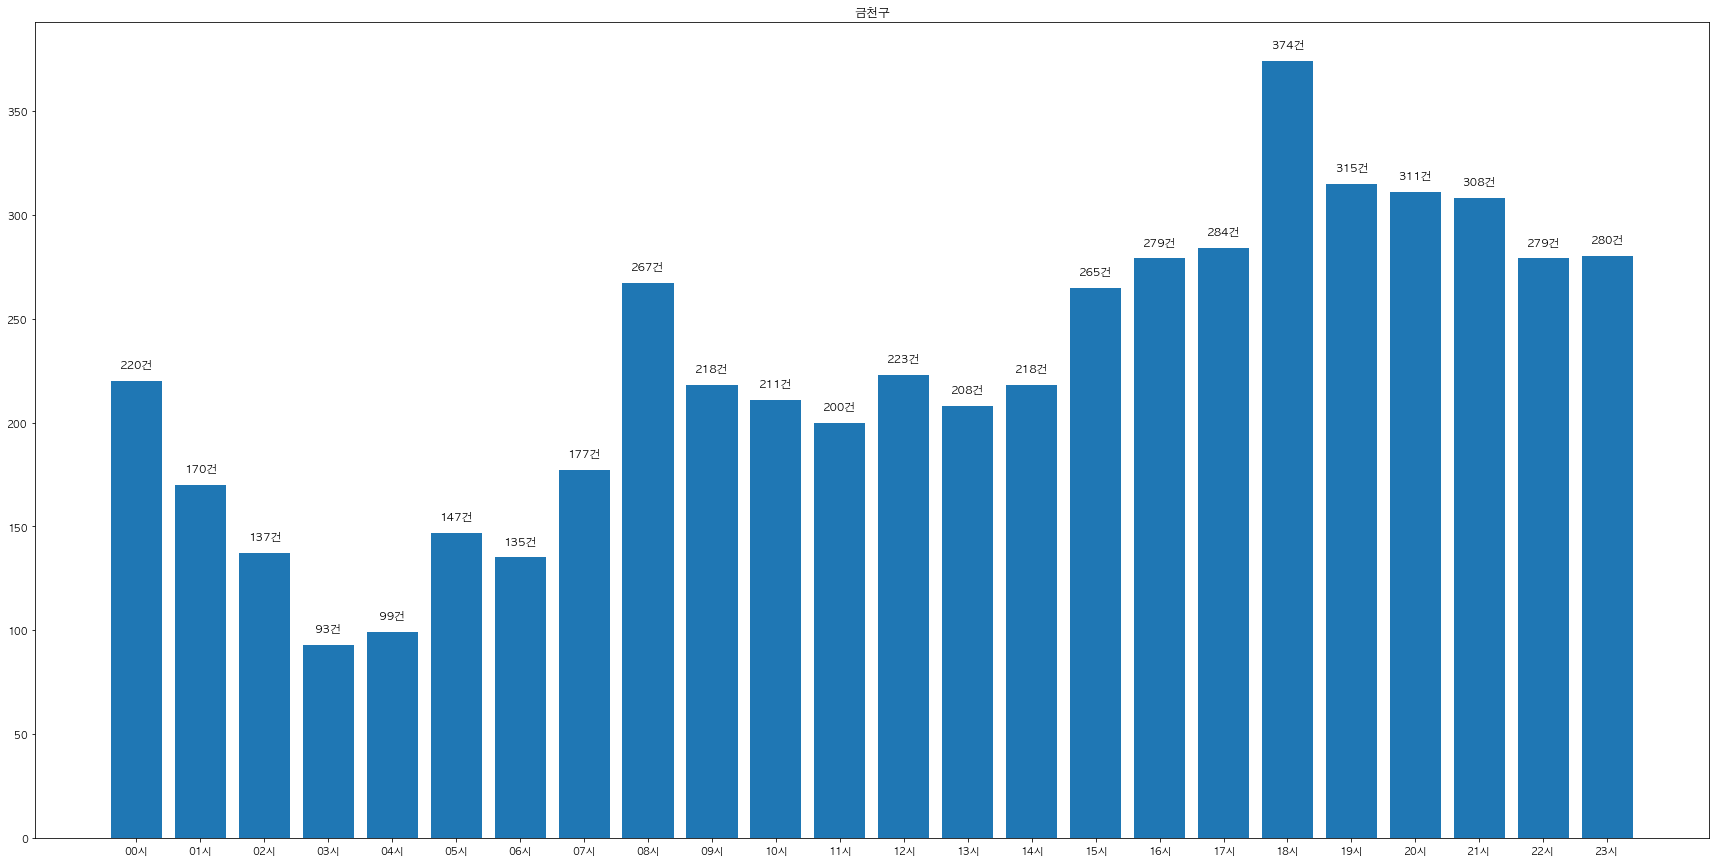

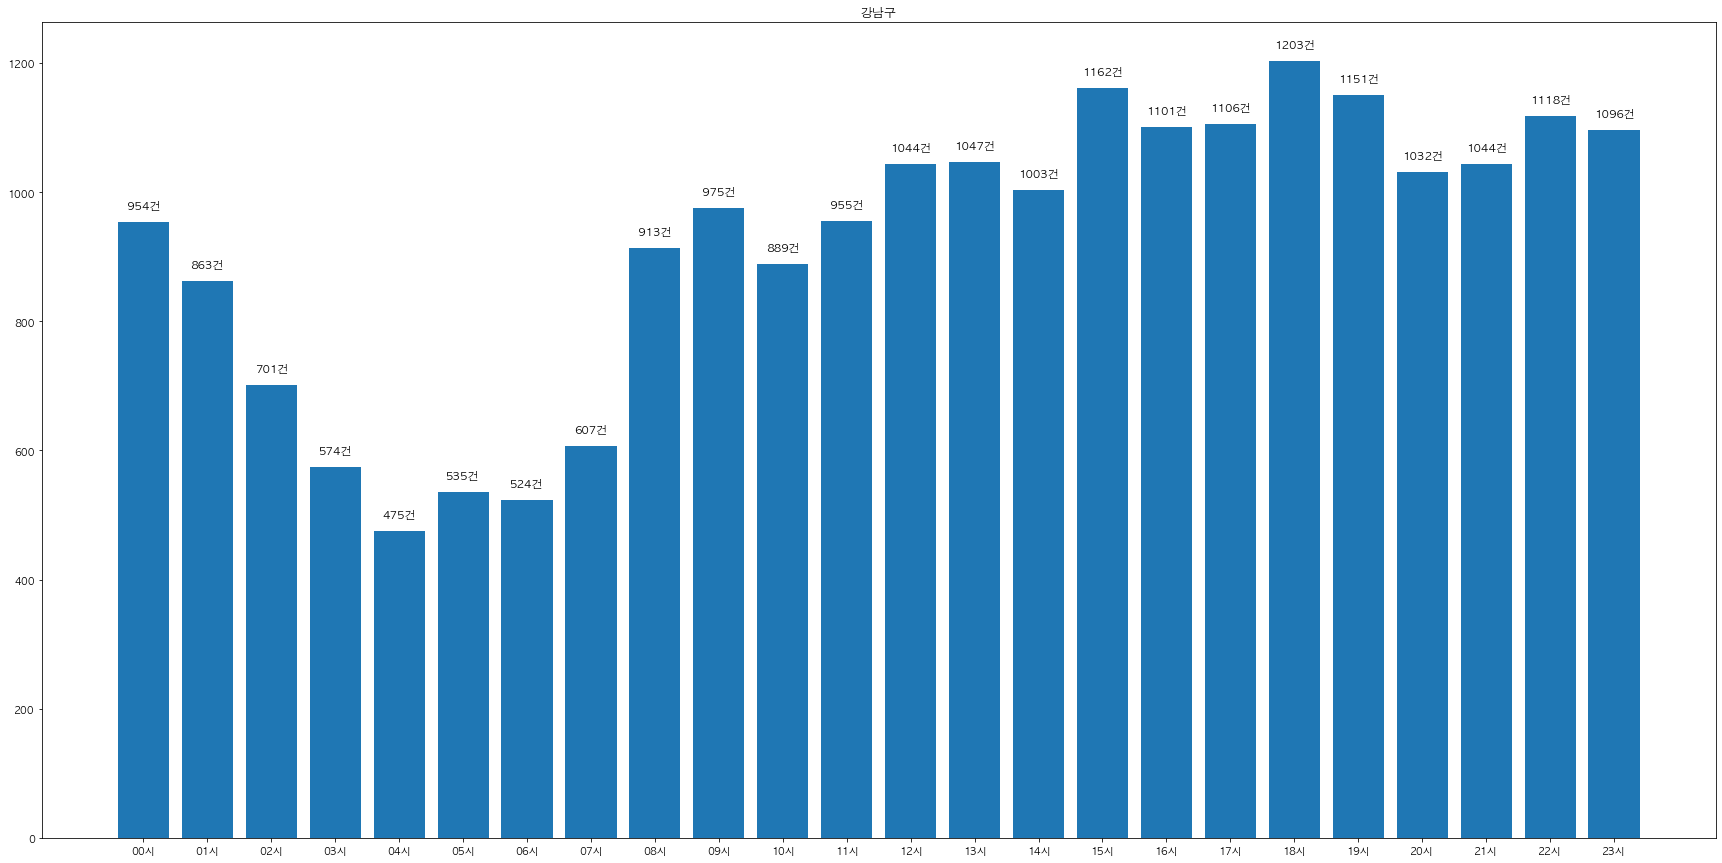

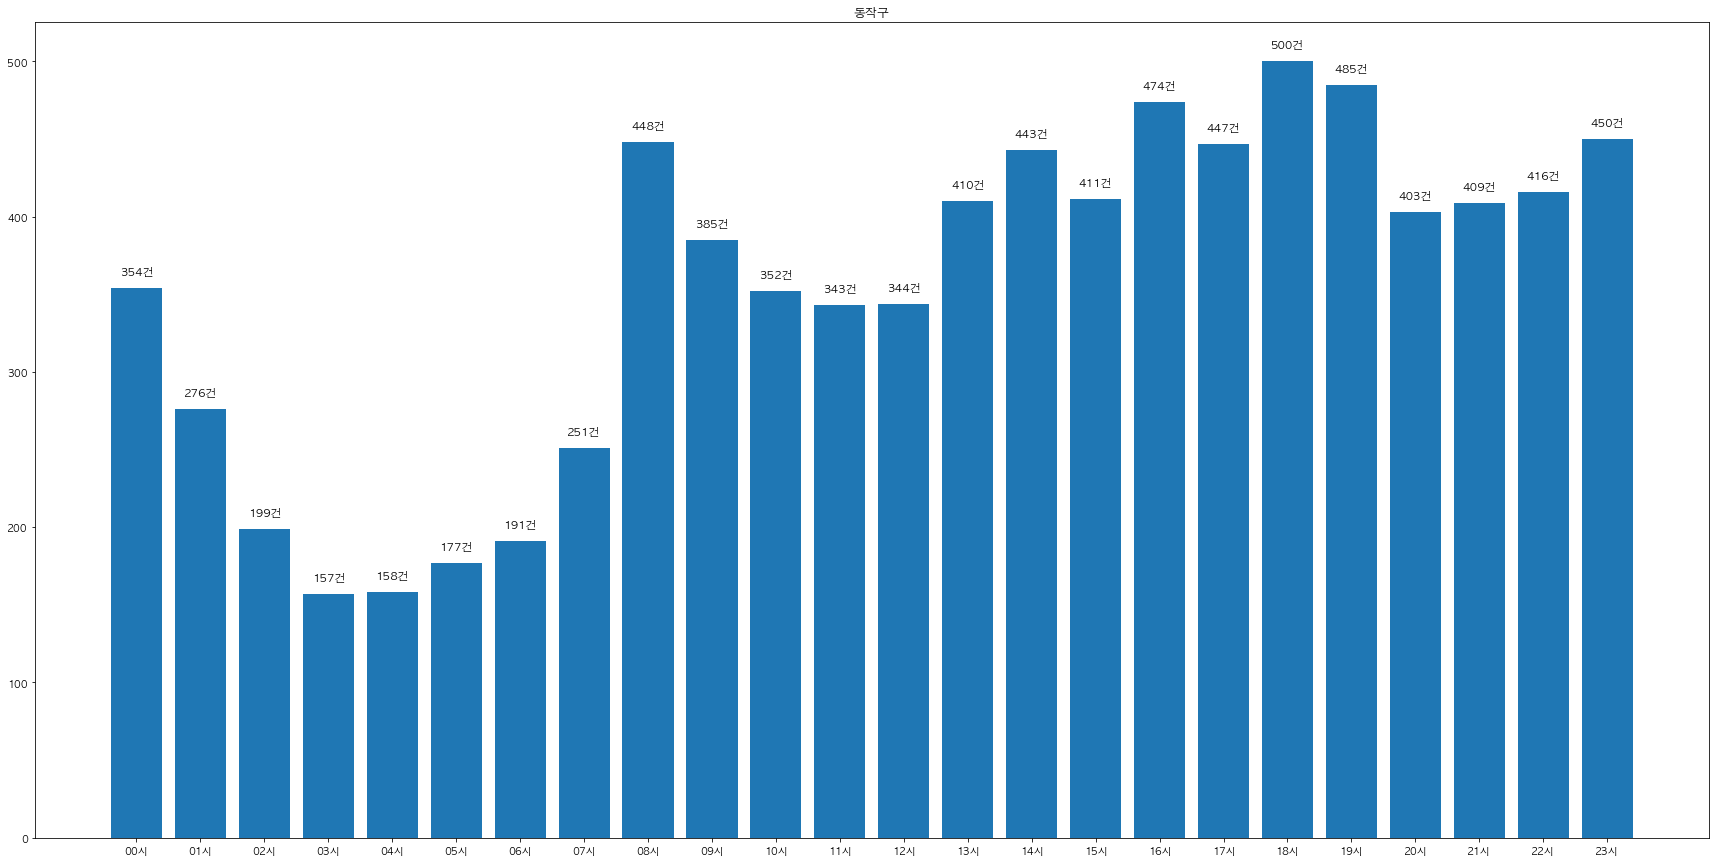

In [313]:
for i in range(0, 24):
    DrawBarGraph(time_cases[i], i)